In [2]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

## Problem: 

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

## 1. Read the data as an appropriate Time Series data and plot the data.
2

### Sparkling

In [3]:
df_spark = pd.read_csv('Sparkling.csv', parse_dates= ['YearMonth'], index_col = 'YearMonth')
df_spark.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [4]:
df_spark.shape

(187, 1)

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,8

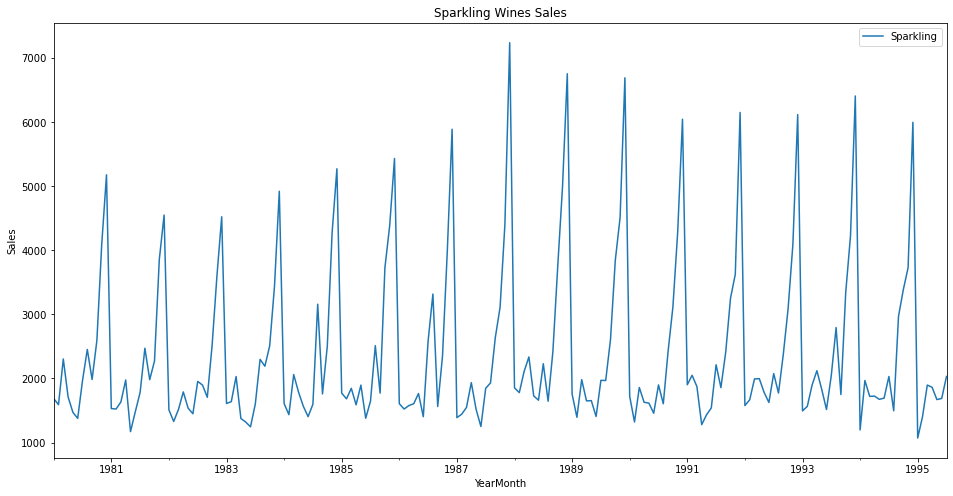

In [6]:
df_spark.plot()
plt.title('Sparkling Wines Sales')
plt.ylabel('Sales')
plt.show()

Inference:\
There are both trend and seasonality in the time series.

### Rose

In [7]:
df_rose = pd.read_csv('Rose.csv', parse_dates= ['YearMonth'], index_col = 'YearMonth')
df_rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

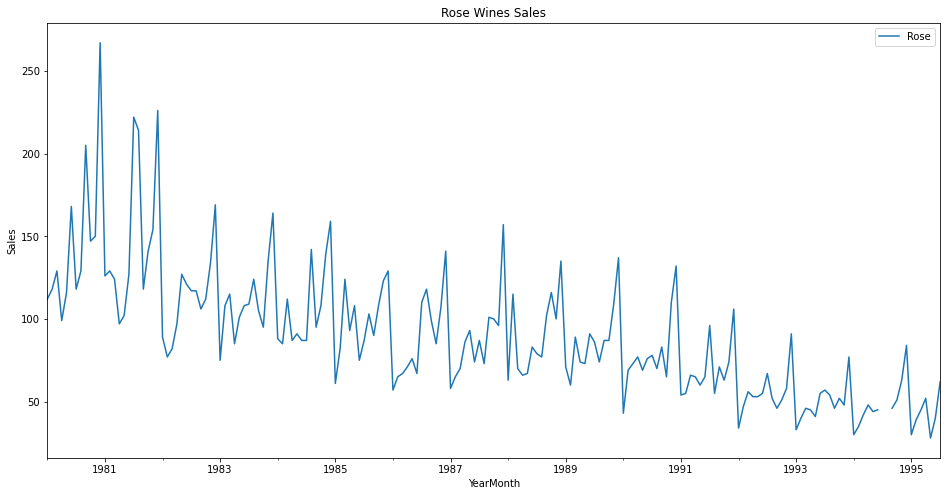

In [8]:
df_rose.plot()
plt.title('Rose Wines Sales')
plt.ylabel('Sales')
plt.show()

Inference:\
There are both trend and seasonality in the time series.

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.
5

### Sparkling

In [9]:
df_spark.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [10]:
df_spark.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [11]:
df_spark.shape

(187, 1)

Data is taken for 187 months from Jan-1980 to Jul-1995, i.e., ~15.6 years.

In [12]:
df_spark['Sparkling'].sort_values()

YearMonth
1995-01-01    1070
1981-05-01    1170
1994-01-01    1197
1983-06-01    1245
1987-06-01    1250
              ... 
1991-12-01    6153
1993-12-01    6410
1989-12-01    6694
1988-12-01    6757
1987-12-01    7242
Name: Sparkling, Length: 187, dtype: int64

In [13]:
df_spark.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

1) Mean sales are ~2402 for 187 months.\
2) Min sales occured in Jan-1995.\
3) Max sales occured in Dec-1987.

In [14]:
df_spark.isnull().sum()

Sparkling    0
dtype: int64

In [15]:
df_spark.duplicated().sum()

11

In [16]:
df_spark[df_spark.duplicated()]

Sparkling
YearMonth            
1984-01-01       1609
1985-09-01       1771
1986-02-01       1523
1987-05-01       1518
1988-08-01       1645
1990-08-01       1605
1992-01-01       1577
1994-02-01       1968
1994-03-01       1720
1995-03-01       1897
1995-07-01       2031

Duplicated records are significant.

In [17]:
df_spark.dtypes

Sparkling    int64
dtype: object

In [18]:
from statsmodels.tsa.api import seasonal_decompose

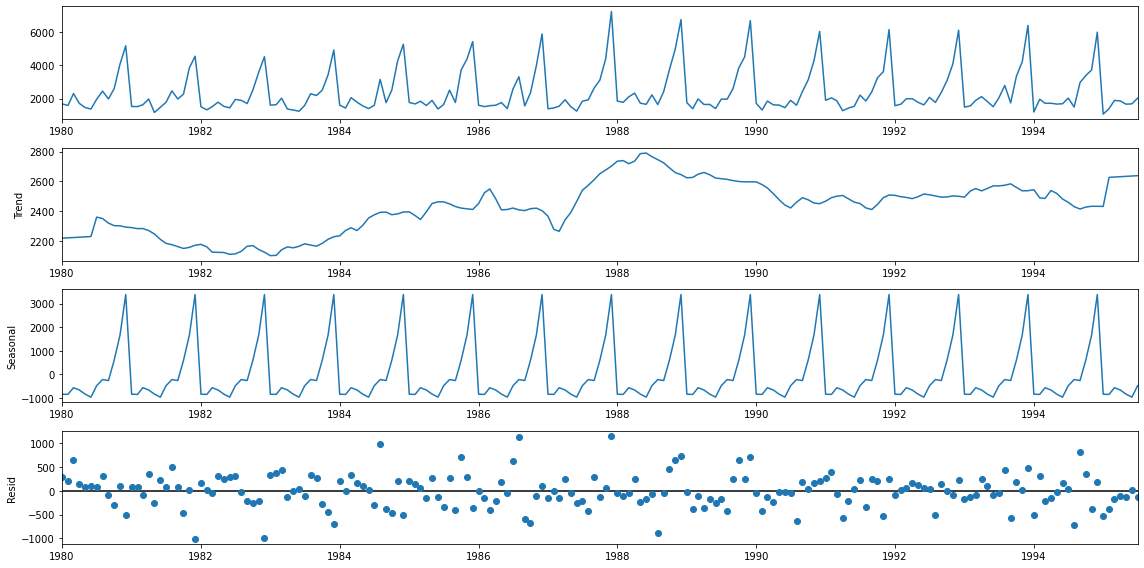

In [19]:
df_spark_decom = seasonal_decompose(df_spark, model= 'additive', extrapolate_trend= 187 )
df_spark_decom.plot()
plt.show();


In [20]:
df_spark_decom.trend

YearMonth
1980-01-01    2219.309920
1980-02-01    2221.565688
1980-03-01    2223.821455
1980-04-01    2226.077222
1980-05-01    2228.332989
                 ...     
1995-03-01    2629.859560
1995-04-01    2632.115327
1995-05-01    2634.371094
1995-06-01    2636.626861
1995-07-01    2638.882629
Name: trend, Length: 187, dtype: float64

In [21]:
df_spark_decom.resid

YearMonth
1980-01-01    304.056384
1980-02-01    215.091318
1980-03-01    642.372730
1980-04-01    145.453621
1980-05-01     74.727221
                 ...    
1995-03-01   -170.665374
1995-04-01   -110.584483
1995-05-01   -132.310884
1995-06-01     13.605945
1995-07-01   -130.316468
Name: resid, Length: 187, dtype: float64

In [22]:
df_spark_decom.seasonal

YearMonth
1980-01-01   -837.366304
1980-02-01   -845.657006
1980-03-01   -562.194185
1980-04-01   -659.530844
1980-05-01   -832.060210
                 ...    
1995-03-01   -562.194185
1995-04-01   -659.530844
1995-05-01   -832.060210
1995-06-01   -962.232806
1995-07-01   -477.566161
Name: seasonal, Length: 187, dtype: float64

In [23]:
## For the July-1995 entry
2638.88-130.31-477.56

2031.0100000000002

In [24]:
df_spark['Sparkling']['1995-07-01']

2031

### Rose

In [25]:
df_rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [26]:
df_rose.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

Data is taken for 187 months from Jan-1980 to Jul-1995, i.e., ~15.6 years.

In [27]:
df_rose.shape

(187, 1)

In [28]:
df_rose['Rose'].sort_values()

YearMonth
1995-05-01     28.0
1994-01-01     30.0
1995-01-01     30.0
1993-01-01     33.0
1992-01-01     34.0
              ...  
1981-07-01    222.0
1981-12-01    226.0
1980-12-01    267.0
1994-07-01      NaN
1994-08-01      NaN
Name: Rose, Length: 187, dtype: float64

In [29]:
df_rose.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  185.0  90.394595  39.175344  28.0  63.0  86.0  112.0  267.0

1) Mean sales are ~91 for 187 months.\
2) Min sales occured in May-1995.\
3) Max sales occured in Dec-1980.

In [30]:
df_rose.duplicated().sum()

90

In [31]:
df_rose[df_rose.duplicated()]

Rose
YearMonth        
1980-07-01  118.0
1980-08-01  129.0
1981-02-01  129.0
1981-09-01  118.0
1982-04-01   97.0
...           ...
1994-11-01   63.0
1995-01-01   30.0
1995-03-01   45.0
1995-04-01   52.0
1995-06-01   40.0

[90 rows x 1 columns]

All duplicated records are significant.

In [32]:
df_rose.isnull().sum()

Rose    2
dtype: int64

In [33]:
df_rose['1994-01-01':'1994-12-01']

Rose
YearMonth       
1994-01-01  30.0
1994-02-01  35.0
1994-03-01  42.0
1994-04-01  48.0
1994-05-01  44.0
1994-06-01  45.0
1994-07-01   NaN
1994-08-01   NaN
1994-09-01  46.0
1994-10-01  51.0
1994-11-01  63.0
1994-12-01  84.0

Text(0, 0.5, 'Sales')

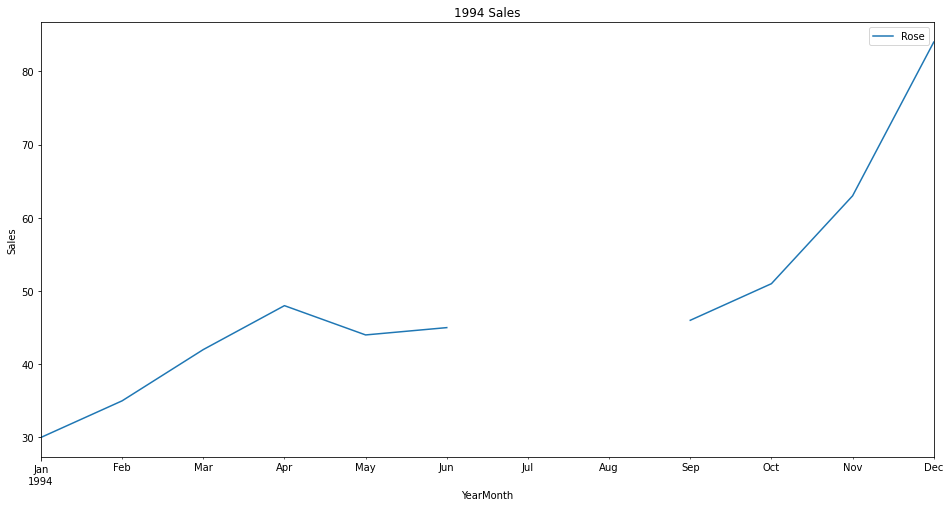

In [34]:
df_rose['1994-01-01':'1994-12-01'].plot()
plt.title('1994 Sales')
plt.ylabel('Sales')

There is slight increase in sales from June to September. Let us impute July null entry with June sales value and August null entry with September. 

In [35]:
df_rose.at['1994-07-01', 'Rose']=45.0
df_rose.at['1994-08-01', 'Rose']=46.0

In [36]:
df_rose['1994-01-01':'1994-12-01']

Rose
YearMonth       
1994-01-01  30.0
1994-02-01  35.0
1994-03-01  42.0
1994-04-01  48.0
1994-05-01  44.0
1994-06-01  45.0
1994-07-01  45.0
1994-08-01  46.0
1994-09-01  46.0
1994-10-01  51.0
1994-11-01  63.0
1994-12-01  84.0

Text(0, 0.5, 'Sales')

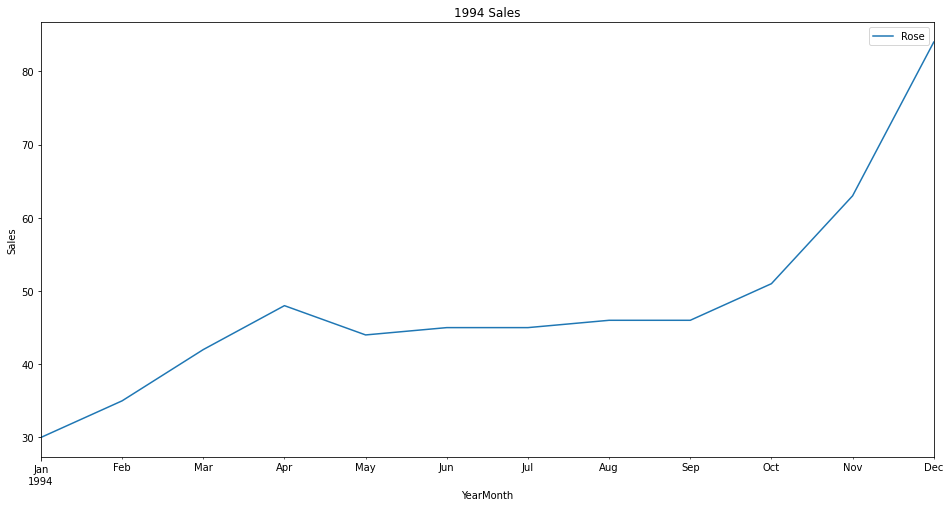

In [37]:
df_rose['1994-01-01':'1994-12-01'].plot()
plt.title('1994 Sales')
plt.ylabel('Sales')

In [38]:
df_rose.isnull().sum()

Rose    0
dtype: int64

In [39]:
df_rose.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  187.0  89.914439  39.238356  28.0  62.5  85.0  111.0  267.0

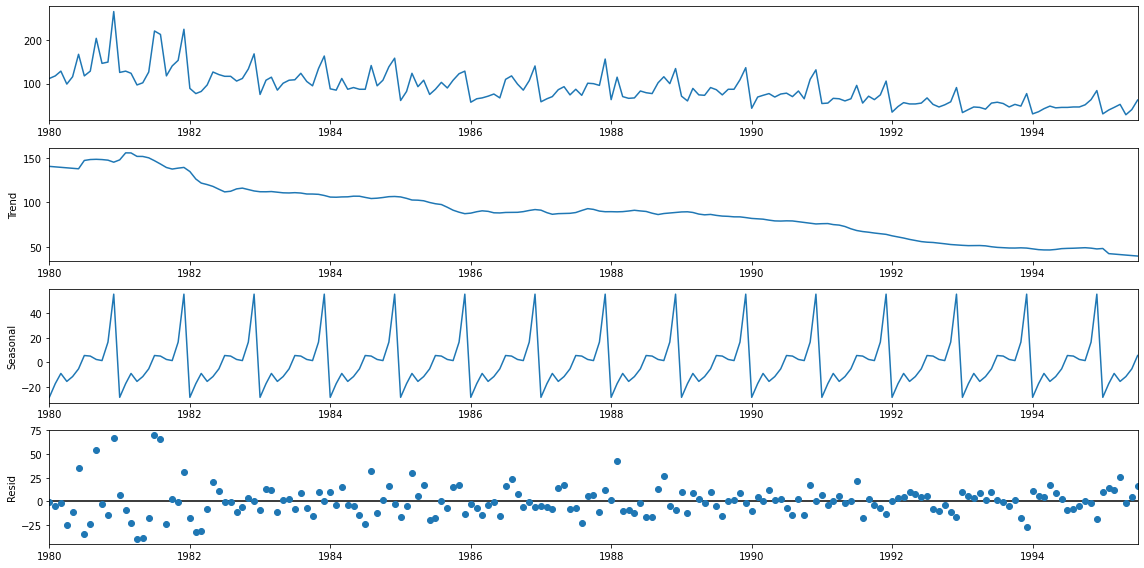

In [40]:
df_rose_decom = seasonal_decompose(df_rose, model= 'additive', extrapolate_trend= 187)
df_rose_decom.plot()
plt.show();

In [41]:
df_rose_decom.trend

YearMonth
1980-01-01    140.426734
1980-02-01    139.884824
1980-03-01    139.342914
1980-04-01    138.801004
1980-05-01    138.259094
                 ...    
1995-03-01     41.799092
1995-04-01     41.257182
1995-05-01     40.715271
1995-06-01     40.173361
1995-07-01     39.631451
Name: trend, Length: 187, dtype: float64

In [42]:
df_rose_decom.seasonal

YearMonth
1980-01-01   -28.306074
1980-02-01   -17.191954
1980-03-01    -8.931507
1980-04-01   -15.387206
1980-05-01   -11.467905
                ...    
1995-03-01    -8.931507
1995-04-01   -15.387206
1995-05-01   -11.467905
1995-06-01    -5.197041
1995-07-01     5.603007
Name: seasonal, Length: 187, dtype: float64

In [43]:
df_rose_decom.resid

YearMonth
1980-01-01    -0.120661
1980-02-01    -4.692870
1980-03-01    -1.411407
1980-04-01   -24.413798
1980-05-01   -10.791189
                ...    
1995-03-01    12.132416
1995-04-01    26.130024
1995-05-01    -1.247367
1995-06-01     5.023680
1995-07-01    16.765542
Name: resid, Length: 187, dtype: float64

In [44]:
df_rose['Rose']['1995-07-01']

62.0

In [45]:
39.6+5.6+16.7

61.900000000000006

## 3. Split the data into training and test. The test data should start in 1991.
2


### Sparkling

In [48]:
train_spark = df_spark['1980-01-01':'1990-12-01']
train_spark.shape

(132, 1)

In [49]:
train_spark.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [50]:
train_spark.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [51]:
test_spark = df_spark['1991-01-01':'1995-07-01']
test_spark.shape

(55, 1)

In [52]:
test_spark.head()

Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

In [53]:
test_spark.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [54]:
132/187

0.7058823529411765

In [55]:
55/187

0.29411764705882354

Data splitted into ~70:30 train/test dataset.

### Rose

In [56]:
train_rose = df_rose['1980-01-01':'1990-12-01']
train_rose.shape

(132, 1)

In [57]:
train_rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [58]:
train_rose.tail()

Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

In [59]:
test_rose = df_rose['1991-01-01':'1995-07-01']
test_rose.shape

(55, 1)

In [60]:
test_rose.head()

Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

In [61]:
test_rose.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

Data splitted into ~70:30 train/test dataset.

## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.
16


### Sparkling

#### 1) Linear Regression

In [62]:
train_time_lr = [i+1 for i in range(len(train_spark))]
test_time_lr = [i+133 for i in range(len(test_spark))]
print('Training Time instance','\n',train_time_lr)
print('\n')
print('Test Time instance','\n',test_time_lr)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [63]:
lr_train_spark = train_spark.copy()
lr_test_spark = test_spark.copy()

In [64]:
lr_train_spark['time'] = train_time_lr
lr_test_spark['time'] = test_time_lr

print('First few rows of Training Data')
display(lr_train_spark.head())
print('Last few rows of Training Data')
display(lr_train_spark.tail())
print('First few rows of Test Data')
display(lr_test_spark.head())
print('Last few rows of Test Data')
display(lr_test_spark.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr_spark = LinearRegression()

In [67]:
lr_spark.fit(lr_train_spark[['time']],lr_train_spark['Sparkling'])

LinearRegression()

In [68]:
lr_train_predictions       = lr_spark.predict(lr_train_spark[['time']])
lr_train_spark['RegOnTime'] = lr_train_predictions

lr_test_predictions       = lr_spark.predict(lr_test_spark[['time']])
lr_test_spark['RegOnTime'] = lr_test_predictions

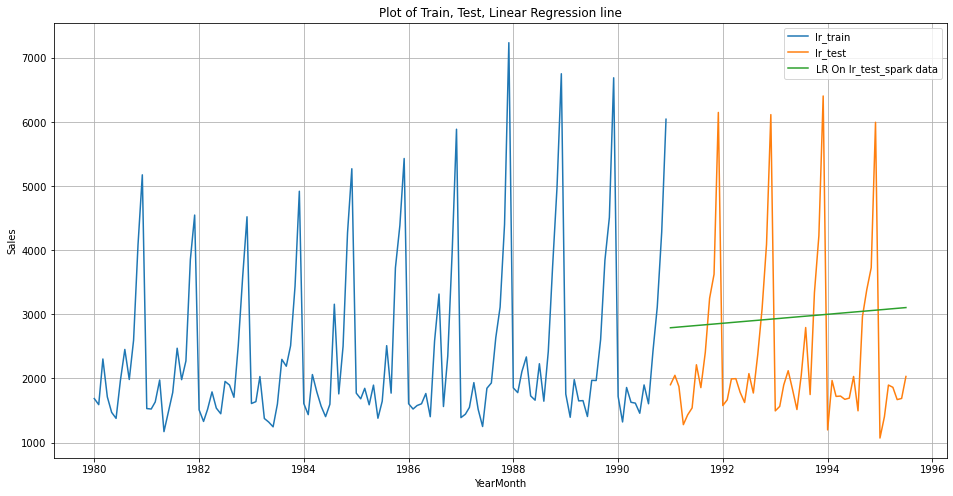

In [71]:
plt.plot(lr_train_spark['Sparkling'], label='lr_train')
plt.plot(lr_test_spark['Sparkling'], label='lr_test')
plt.plot(lr_test_spark['RegOnTime'], label='LR On lr_test_spark data')
plt.title('Plot of Train, Test, Linear Regression line')
plt.xlabel('YearMonth')
plt.ylabel('Sales')

plt.legend(loc='best')
plt.grid();

In [165]:
from sklearn import metrics

In [166]:
rmse_lr_test = metrics.mean_squared_error(lr_test_spark['Sparkling'], lr_test_predictions, squared=False) 
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_lr_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [167]:
resultsDf_spark = pd.DataFrame({'Test RMSE': [rmse_lr_test]},index=['RegressionOnTime'])
resultsDf_spark

Test RMSE
RegressionOnTime  1389.135175

#### 2) Naive approach

In [73]:
Naive_train_spark = train_spark.copy()
Naive_test_spark = test_spark.copy()

In [74]:
train_spark.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [75]:
len(np.asarray(train_spark['Sparkling']))-1

131

In [76]:
Naive_test_spark['naive'] = np.asarray(train_spark['Sparkling'])[len(np.asarray(train_spark['Sparkling']))-1]
Naive_test_spark['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

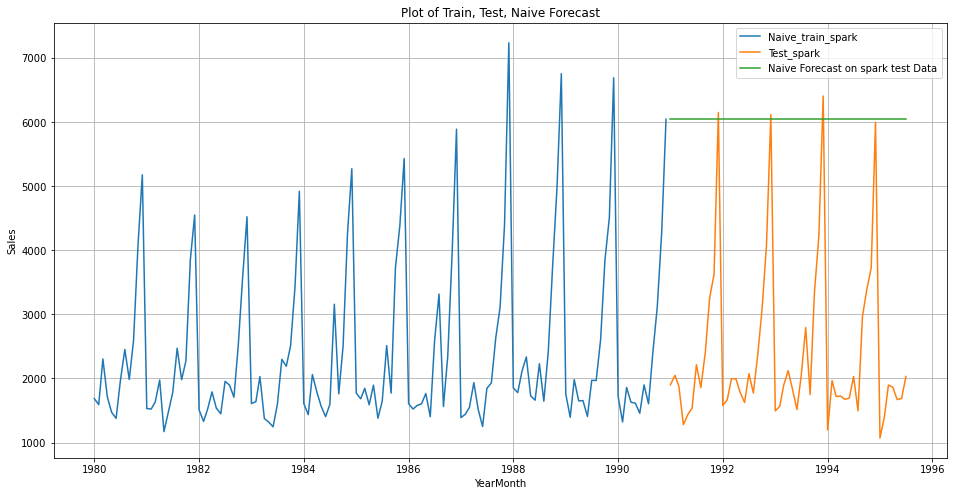

In [79]:
plt.plot(Naive_train_spark['Sparkling'], label='Naive_train_spark')
plt.plot(test_spark['Sparkling'], label='Test_spark')
plt.plot(Naive_test_spark['naive'], label='Naive Forecast on spark test Data')

plt.legend(loc='best')
plt.title("Plot of Train, Test, Naive Forecast")
plt.ylabel('Sales')
plt.xlabel('YearMonth')
plt.grid();

In [173]:
rmse_naive_test = metrics.mean_squared_error(test_spark['Sparkling'],Naive_test_spark['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_naive_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [174]:
resultsDf_spark_naive = pd.DataFrame({'Test RMSE': [rmse_naive_test]},index=['NaiveModel'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsDf_spark_naive])
resultsDf_spark

Test RMSE
RegressionOnTime  1389.135175
NaiveModel        3864.279352

#### 3) Simple average

In [81]:
SA_train_spark = train_spark.copy()
SA_test_spark = test_spark.copy()

In [82]:
SA_test_spark['mean_forecast'] = train_spark['Sparkling'].mean()
SA_test_spark.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

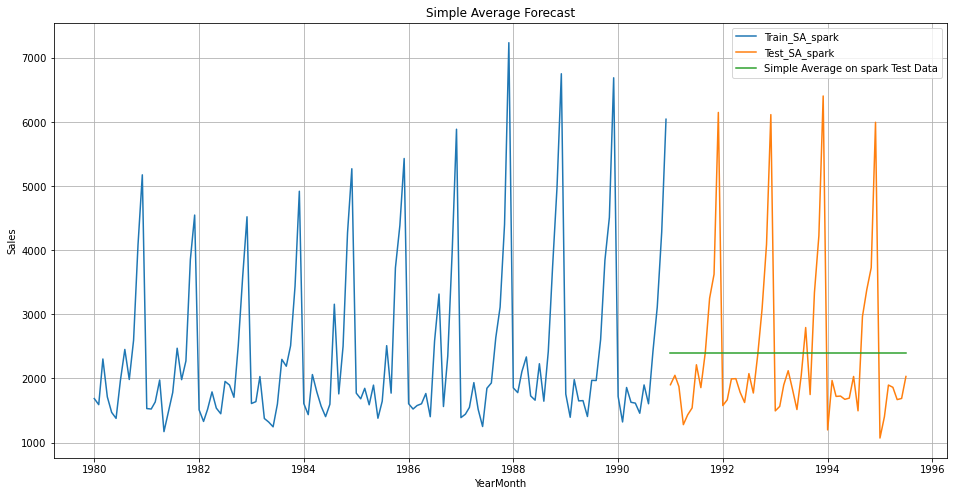

In [83]:
plt.plot(SA_train_spark['Sparkling'], label='Train_SA_spark')
plt.plot(SA_test_spark['Sparkling'], label='Test_SA_spark')

plt.plot(SA_test_spark['mean_forecast'], label='Simple Average on spark Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.ylabel('Sales')
plt.xlabel('YearMonth')
plt.grid();

In [84]:
rmse_SA_test_spark = metrics.mean_squared_error(test_spark['Sparkling'],SA_test_spark['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_SA_test_spark))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [179]:
resultsDf_SA = pd.DataFrame({'Test RMSE': [rmse_SA_test_spark]}
                           ,index=['SimpleAverageModel'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsDf_SA])
resultsDf_spark

Test RMSE
RegressionOnTime    1389.135175
NaiveModel          3864.279352
SimpleAverageModel  1275.081804

#### 4) Moving average

In [85]:
MovingAverage = df_spark.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [86]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_8'] = MovingAverage['Sparkling'].rolling(8).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_8
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

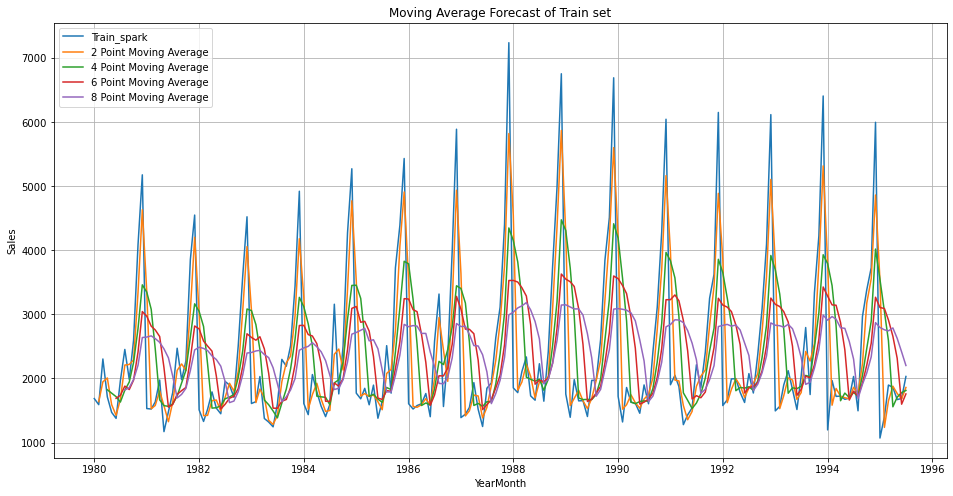

In [92]:
plt.plot(MovingAverage['Sparkling'], label='Train_spark')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_8'],label = '8 Point Moving Average')

plt.legend(loc = 'best')
plt.title("Moving Average Forecast of Train set")
plt.ylabel('Sales')
plt.xlabel('YearMonth')
plt.grid();

In [88]:
trailing_MovingAverage_train_spark = MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test_spark = MovingAverage[int(len(MovingAverage)*0.71):]

In [89]:
trailing_MovingAverage_train_spark.shape

(132, 5)

In [90]:
trailing_MovingAverage_test_spark.shape

(55, 5)

In [189]:
print('MovingAverage train first five records','\n', trailing_MovingAverage_train_spark.head())
print('\n')
print('MovingAverage train last five records','\n', trailing_MovingAverage_train_spark.tail())
print('\n')
print('MovingAverage test first five records','\n', trailing_MovingAverage_test_spark.head())
print('\n')
print('MovingAverage test last five records','\n', trailing_MovingAverage_test_spark.tail())

MovingAverage train first five records 
             Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_8
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN


MovingAverage train last five records 
             Sparkling  Trailing_2  Trailing_4   Trailing_6  Trailing_8
YearMonth                                                             
1990-08-01       1605      1752.0     1644.00  1677.166667    1638.000
1990-09-01       2424      2014.5     1846.25  1771.333333    1726.000
1990-10-01       3116      2770.0     2261.00  2019.333333    1950.375
1990-11-01       4286      3701.0     2857.75  2464.500000    2253.750
1

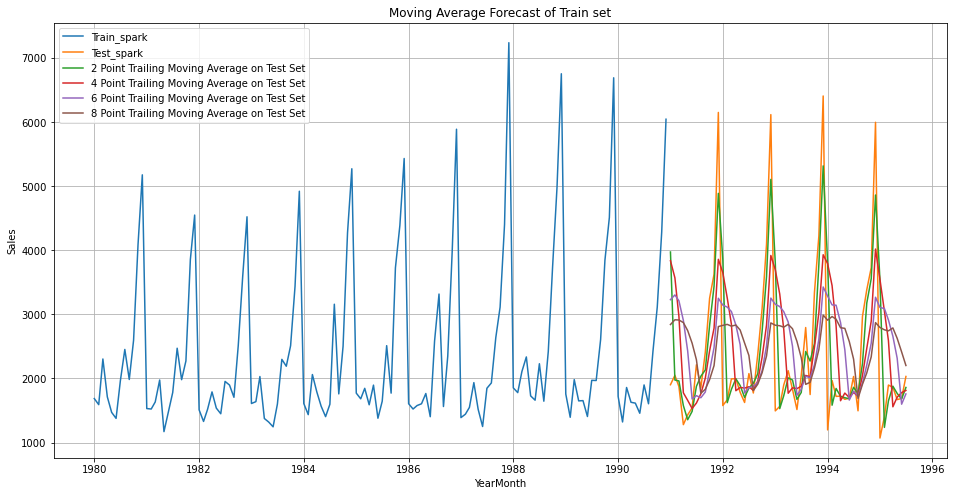

In [93]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train_spark['Sparkling'], label='Train_spark')
plt.plot(trailing_MovingAverage_test_spark['Sparkling'], label='Test_spark')

plt.plot(trailing_MovingAverage_test_spark['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_spark['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_spark['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_spark['Trailing_8'],label = '8 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.title("Moving Average Forecast of Train set")
plt.ylabel('Sales')
plt.xlabel('YearMonth')
plt.grid();

In [152]:
rmse_MA2_test_spark = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test_spark['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the spark Test Data,  RMSE is %3.3f" %(rmse_MA2_test_spark))

rmse_MA4_test_spark = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test_spark['Trailing_4'],squared=False)
print("For 2 point Moving Average Model forecast on the spark Test Data,  RMSE is %3.3f" %(rmse_MA4_test_spark))

rmse_MA6_test_spark = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test_spark['Trailing_6'],squared=False)
print("For 2 point Moving Average Model forecast on the spark Test Data,  RMSE is %3.3f" %(rmse_MA6_test_spark))

rmse_MA8_test_spark = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test_spark['Trailing_8'],squared=False)
print("For 2 point Moving Average Model forecast on the spark Test Data,  RMSE is %3.3f" %(rmse_MA8_test_spark))

For 2 point Moving Average Model forecast on the spark Test Data,  RMSE is 813.401
For 2 point Moving Average Model forecast on the spark Test Data,  RMSE is 1156.590
For 2 point Moving Average Model forecast on the spark Test Data,  RMSE is 1283.927
For 2 point Moving Average Model forecast on the spark Test Data,  RMSE is 1342.568


In [192]:
resultsDf_MA = pd.DataFrame({'Test RMSE': [rmse_MA2_test_spark,rmse_MA4_test_spark
                                          ,rmse_MA6_test_spark,rmse_MA8_test_spark]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','8pointTrailingMovingAverage'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsDf_MA])
resultsDf_spark

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
8pointTrailingMovingAverage  1342.567772

#### 5) Simple exponential smoothing

In [94]:
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [95]:
SES_train_spark = train_spark.copy()
SES_test_spark = test_spark.copy()

In [96]:
model_SES_spark = SimpleExpSmoothing(SES_train_spark, initialization_method='estimated')
model_SES_autofit_spark = model_SES_spark.fit(optimized=True)

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [97]:
model_SES_autofit_spark.params

{'smoothing_level': 0.07029459943040381,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.1004162520212,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Smoothing parameter is close to 0, forecasts will farther from the actual values

In [99]:
SES_predict_spark = model_SES_autofit_spark.forecast(steps=len(test_spark))
SES_predict_spark

1991-01-01    2804.687529
1991-02-01    2804.687529
1991-03-01    2804.687529
1991-04-01    2804.687529
1991-05-01    2804.687529
1991-06-01    2804.687529
1991-07-01    2804.687529
1991-08-01    2804.687529
1991-09-01    2804.687529
1991-10-01    2804.687529
1991-11-01    2804.687529
1991-12-01    2804.687529
1992-01-01    2804.687529
1992-02-01    2804.687529
1992-03-01    2804.687529
1992-04-01    2804.687529
1992-05-01    2804.687529
1992-06-01    2804.687529
1992-07-01    2804.687529
1992-08-01    2804.687529
1992-09-01    2804.687529
1992-10-01    2804.687529
1992-11-01    2804.687529
1992-12-01    2804.687529
1993-01-01    2804.687529
1993-02-01    2804.687529
1993-03-01    2804.687529
1993-04-01    2804.687529
1993-05-01    2804.687529
1993-06-01    2804.687529
1993-07-01    2804.687529
1993-08-01    2804.687529
1993-09-01    2804.687529
1993-10-01    2804.687529
1993-11-01    2804.687529
1993-12-01    2804.687529
1994-01-01    2804.687529
1994-02-01    2804.687529
1994-03-01  

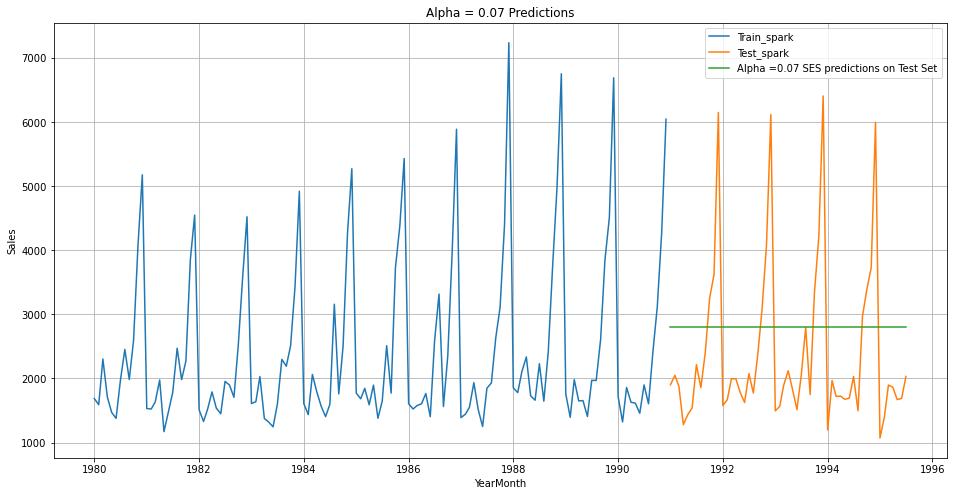

In [100]:
plt.plot(train_spark, label='Train_spark')
plt.plot(test_spark, label='Test_spark')

plt.plot(SES_predict_spark, label='Alpha =0.07 SES predictions on Test Set')

plt.legend(loc='best')
plt.ylabel('Sales')
plt.xlabel('YearMonth')
plt.grid()
plt.title('Alpha = 0.07 Predictions');

In [101]:
rmse_SES_test_spark = metrics.mean_squared_error(test_spark['Sparkling'],SES_predict_spark.values,squared=False)
print("For SES model on the Test Data,  RMSE is %3.3f" %(rmse_SES_test_spark))

For SES model on the Test Data,  RMSE is 1338.012


In [200]:
resultsDf_SES = pd.DataFrame({'Test RMSE': [rmse_SES_test_spark]}
                           ,index=['SESModel'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsDf_SES])
resultsDf_spark

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
8pointTrailingMovingAverage  1342.567772
SESModel                     1338.012144

#### 6) Double exponential smoothing

In [106]:
DES_train_spark = train_spark.copy()
DES_test_spark = test_spark.copy()

In [107]:
model_DES_spark = Holt(train_spark,initialization_method='estimated')
model_DES_spark = model_DES_spark.fit()

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [108]:
model_DES_spark.params

{'smoothing_level': 0.6638769092832238,
 'smoothing_trend': 9.966251357628782e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.5681711003654,
 'initial_trend': 29.020225552837097,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Smoothing level improved from 0.07 to 0.66 from SES to DES. 

In [110]:
DES_predict_spark =  model_DES_spark.forecast(len(test_spark))
DES_predict_spark

1991-01-01    5330.501799
1991-02-01    5359.520204
1991-03-01    5388.538609
1991-04-01    5417.557013
1991-05-01    5446.575418
1991-06-01    5475.593823
1991-07-01    5504.612228
1991-08-01    5533.630633
1991-09-01    5562.649038
1991-10-01    5591.667443
1991-11-01    5620.685847
1991-12-01    5649.704252
1992-01-01    5678.722657
1992-02-01    5707.741062
1992-03-01    5736.759467
1992-04-01    5765.777872
1992-05-01    5794.796277
1992-06-01    5823.814682
1992-07-01    5852.833086
1992-08-01    5881.851491
1992-09-01    5910.869896
1992-10-01    5939.888301
1992-11-01    5968.906706
1992-12-01    5997.925111
1993-01-01    6026.943516
1993-02-01    6055.961920
1993-03-01    6084.980325
1993-04-01    6113.998730
1993-05-01    6143.017135
1993-06-01    6172.035540
1993-07-01    6201.053945
1993-08-01    6230.072350
1993-09-01    6259.090754
1993-10-01    6288.109159
1993-11-01    6317.127564
1993-12-01    6346.145969
1994-01-01    6375.164374
1994-02-01    6404.182779
1994-03-01  

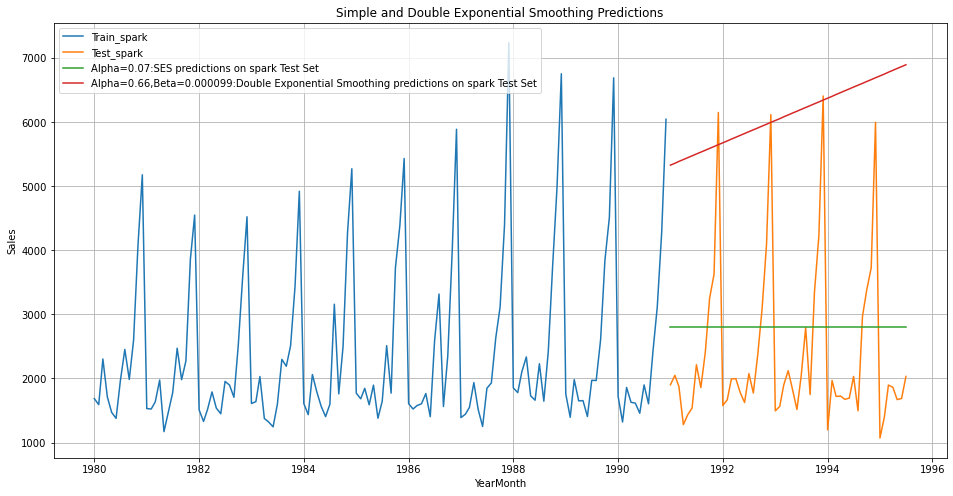

In [111]:
plt.plot(train_spark, label='Train_spark')
plt.plot(test_spark, label='Test_spark')

plt.plot(SES_predict_spark, label='Alpha=0.07:SES predictions on spark Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.66,Beta=0.000099:Double Exponential Smoothing predictions on spark Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions')
plt.xlabel('YearMonth')
plt.ylabel('Sales');

In [112]:
rmse_DES_test_spark = metrics.mean_squared_error(test_spark['Sparkling'],DES_predict_spark.values,squared=False)
print("For SES model on the Test Data,  RMSE is %3.3f" %(rmse_DES_test_spark))

For SES model on the Test Data,  RMSE is 3949.993


In [207]:
resultsDf_DES = pd.DataFrame({'Test RMSE': [rmse_DES_test_spark]}
                           ,index=['DESModel'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsDf_DES])
resultsDf_spark

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
8pointTrailingMovingAverage  1342.567772
SESModel                     1338.012144
DESModel                     3949.993290

#### 7) Triple exponential smoothing

In [113]:
TES_train_spark = train_spark.copy()
TES_test_spark = test_spark.copy()

In [114]:
model_TES_spark = ExponentialSmoothing(train_spark,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES_spark = model_TES_spark.fit()

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [115]:
model_TES_spark.params

{'smoothing_level': 0.10005373820823961,
 'smoothing_trend': 0.010034490652580457,
 'smoothing_seasonal': 0.5095957543425532,
 'damping_trend': nan,
 'initial_level': 2364.584774604334,
 'initial_trend': -0.016752880078245408,
 'initial_seasons': array([-653.82559323, -736.67734144, -368.25456128, -483.63906084,
        -826.15467946, -832.96819741, -386.3751117 ,   91.82676187,
        -261.32455153,  265.38968222, 1580.26233564, 2619.56221896]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

All the parameters changed, alpha from 0.66 to 0.01, beta from 0.00009 to 0.01

In [116]:
TES_predict_spark =  model_TES_spark.forecast(len(test_spark))
TES_predict_spark

1991-01-01    1509.969093
1991-02-01    1205.343244
1991-03-01    1702.386113
1991-04-01    1548.514691
1991-05-01    1467.824074
1991-06-01    1287.109239
1991-07-01    1804.027662
1991-08-01    1646.339830
1991-09-01    2326.596637
1991-10-01    3228.612283
1991-11-01    4303.269444
1991-12-01    6460.680111
1992-01-01    1505.580741
1992-02-01    1200.954892
1992-03-01    1697.997760
1992-04-01    1544.126339
1992-05-01    1463.435722
1992-06-01    1282.720887
1992-07-01    1799.639310
1992-08-01    1641.951478
1992-09-01    2322.208285
1992-10-01    3224.223931
1992-11-01    4298.881092
1992-12-01    6456.291759
1993-01-01    1501.192388
1993-02-01    1196.566540
1993-03-01    1693.609408
1993-04-01    1539.737987
1993-05-01    1459.047370
1993-06-01    1278.332535
1993-07-01    1795.250957
1993-08-01    1637.563125
1993-09-01    2317.819933
1993-10-01    3219.835579
1993-11-01    4294.492739
1993-12-01    6451.903407
1994-01-01    1496.804036
1994-02-01    1192.178188
1994-03-01  

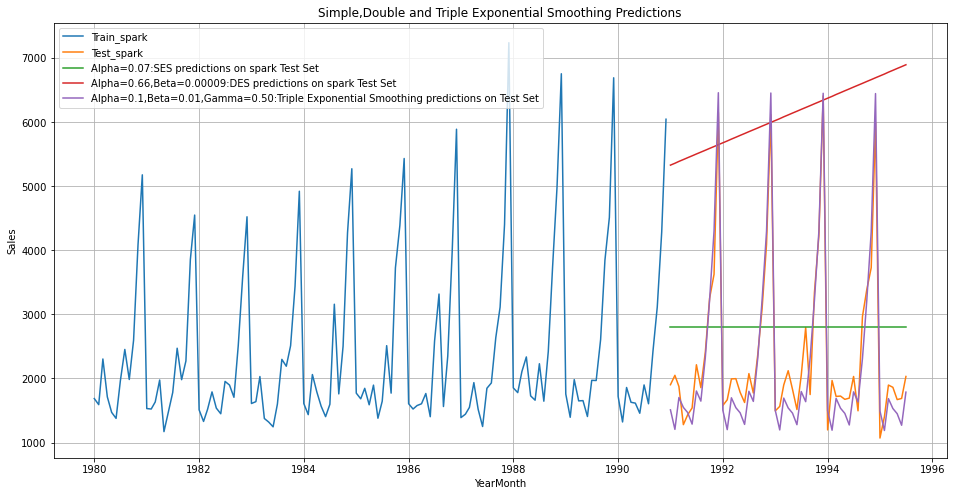

In [119]:
plt.plot(train_spark, label='Train_spark')
plt.plot(test_spark, label='Test_spark')

plt.plot(SES_predict_spark, label='Alpha=0.07:SES predictions on spark Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.66,Beta=0.00009:DES predictions on spark Test Set')
plt.plot(TES_predict_spark, label='Alpha=0.1,Beta=0.01,Gamma=0.50:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions')
plt.xlabel('YearMonth')
plt.ylabel('Sales');

In [213]:
rmse_TES_test_spark = metrics.mean_squared_error(test_spark['Sparkling'],TES_predict_spark.values,squared=False)
print("For SES model on the Test Data,  RMSE is %3.3f" %(rmse_TES_test_spark))

For SES model on the Test Data,  RMSE is 379.696


In [214]:
resultsDf_TES = pd.DataFrame({'Test RMSE': [rmse_TES_test_spark]}
                           ,index=['TESModel'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsDf_TES])
resultsDf_spark

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
8pointTrailingMovingAverage  1342.567772
SESModel                     1338.012144
DESModel                     3949.993290
TESModel                      379.695686

### Rose

#### 1) Linear Regression

In [120]:
train_time_lr_rose = [i+1 for i in range(len(train_rose))]
test_time_lr_rose = [i+133 for i in range(len(test_rose))]
print('Training Time instance rose','\n',train_time_lr_rose)
print('\n')
print('Test Time instance rose','\n',test_time_lr_rose)

Training Time instance rose 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Test Time instance rose 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [121]:
lr_train_rose = train_rose.copy()
lr_test_rose = test_rose.copy()

In [122]:
lr_train_rose['time'] = train_time_lr_rose
lr_test_rose['time'] = test_time_lr_rose

print('First few rows of Training Data')
display(lr_train_rose.head())
print('Last few rows of Training Data')
display(lr_train_rose.tail())
print('First few rows of Test Data')
display(lr_test_rose.head())
print('Last few rows of Test Data')
display(lr_test_rose.tail())

First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

First few rows of Test Data


Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187

In [123]:
lr_rose = LinearRegression()

In [124]:
lr_rose.fit(lr_train_rose[['time']],lr_train_rose['Rose'])

LinearRegression()

In [125]:
lr_train_predictions_rose       = lr_rose.predict(lr_train_rose[['time']])
lr_train_rose['RegOnTime'] = lr_train_predictions_rose

lr_test_predictions_rose     = lr_rose.predict(lr_test_rose[['time']])
lr_test_rose['RegOnTime'] = lr_test_predictions_rose

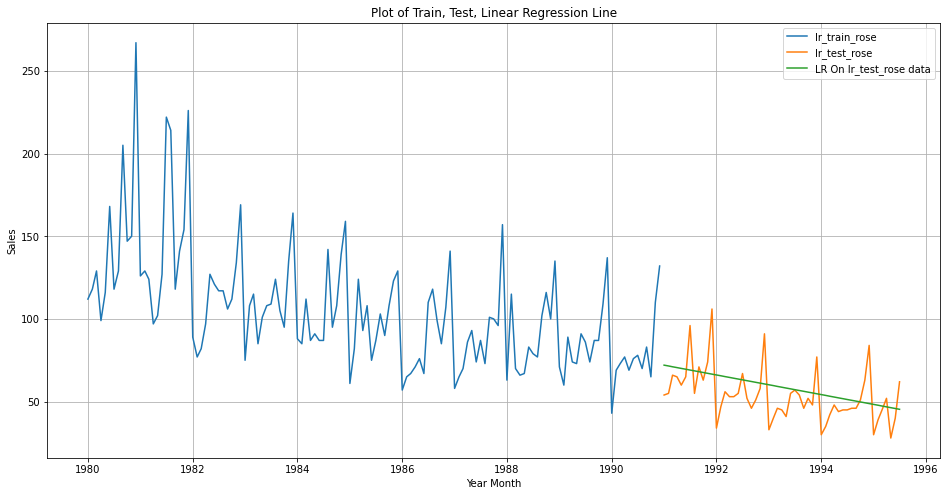

In [126]:
plt.plot(lr_train_rose['Rose'], label='lr_train_rose')
plt.plot(lr_test_rose['Rose'], label='lr_test_rose')
plt.plot(lr_test_rose['RegOnTime'], label='LR On lr_test_rose data')

plt.legend(loc='best')
plt.title('Plot of Train, Test, Linear Regression Line')
plt.xlabel('Year Month')
plt.ylabel('Sales')
plt.grid();

In [194]:
rmse_lr_test_rose = metrics.mean_squared_error(lr_test_rose['Rose'], lr_test_predictions_rose, squared=False) 
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_lr_test_rose))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 


In [195]:
resultsDf_rose = pd.DataFrame({'Test RMSE': [rmse_lr_test_rose]},index=['RegressionOnTime'])
resultsDf_rose

Test RMSE
RegressionOnTime  15.269416

#### 2) Naive approach

In [127]:
Naive_train_rose = train_rose.copy()
Naive_test_rose = test_rose.copy()

In [128]:
train_rose.tail()

Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

In [129]:
len(np.asarray(train_rose['Rose']))-1

131

In [130]:
Naive_test_rose['naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
Naive_test_rose['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

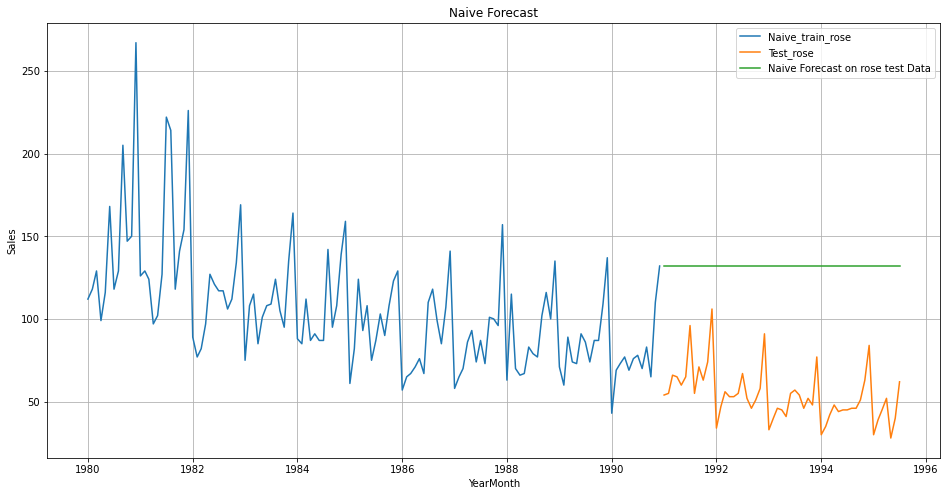

In [131]:
plt.plot(Naive_train_rose['Rose'], label='Naive_train_rose')
plt.plot(test_rose['Rose'], label='Test_rose')

plt.plot(Naive_test_rose['naive'], label='Naive Forecast on rose test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.xlabel('YearMonth')
plt.ylabel('Sales')
plt.grid();

In [197]:
rmse_naive_test_rose = metrics.mean_squared_error(test_rose['Rose'],Naive_test_rose['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_naive_test_rose))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [198]:
resultsDf_rose_naive = pd.DataFrame({'Test RMSE': [rmse_naive_test_rose]},index=['NaiveModel'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_rose_naive])
resultsDf_rose

Test RMSE
RegressionOnTime  15.269416
NaiveModel        79.718824

#### 3) Simple average

In [132]:
SA_train_rose = train_rose.copy()
SA_test_rose = test_rose.copy()

In [133]:
SA_test_rose['mean_forecast'] = train_rose['Rose'].mean()
SA_test_rose.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

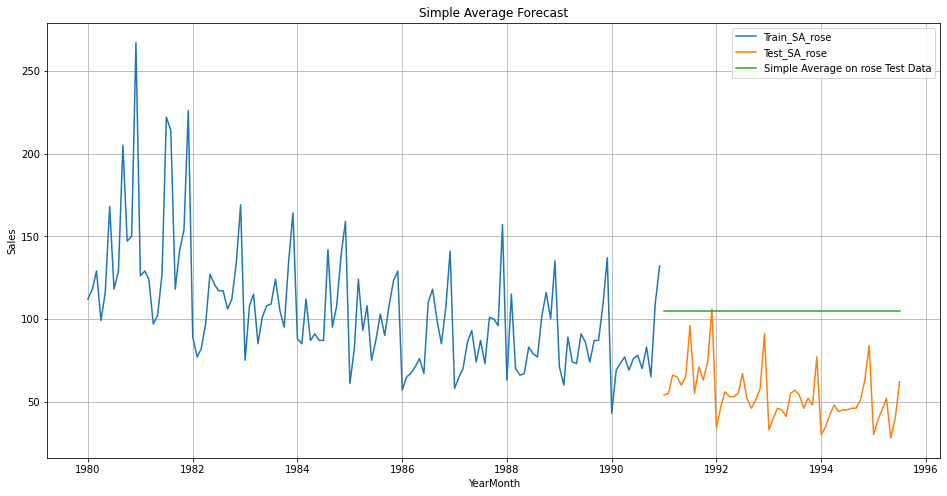

In [135]:
plt.plot(SA_train_rose['Rose'], label='Train_SA_rose')
plt.plot(SA_test_rose['Rose'], label='Test_SA_rose')

plt.plot(SA_test_rose['mean_forecast'], label='Simple Average on rose Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.xlabel('YearMonth')
plt.ylabel('Sales')
plt.grid();

In [199]:
rmse_SA_test_rose = metrics.mean_squared_error(test_rose['Rose'],SA_test_rose['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_SA_test_rose))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [200]:
resultsDf_SA_rose = pd.DataFrame({'Test RMSE': [rmse_SA_test_rose]}
                           ,index=['SimpleAverageModel'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_SA_rose])
resultsDf_rose

Test RMSE
RegressionOnTime    15.269416
NaiveModel          79.718824
SimpleAverageModel  53.460645

#### 4) Moving average

In [142]:
MovingAverage_rose = df_rose.copy()
MovingAverage_rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [143]:
MovingAverage_rose['Trailing_2'] = MovingAverage_rose['Rose'].rolling(2).mean()
MovingAverage_rose['Trailing_4'] = MovingAverage_rose['Rose'].rolling(4).mean()
MovingAverage_rose['Trailing_6'] = MovingAverage_rose['Rose'].rolling(6).mean()
MovingAverage_rose['Trailing_8'] = MovingAverage_rose['Rose'].rolling(8).mean()

MovingAverage_rose.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_8
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

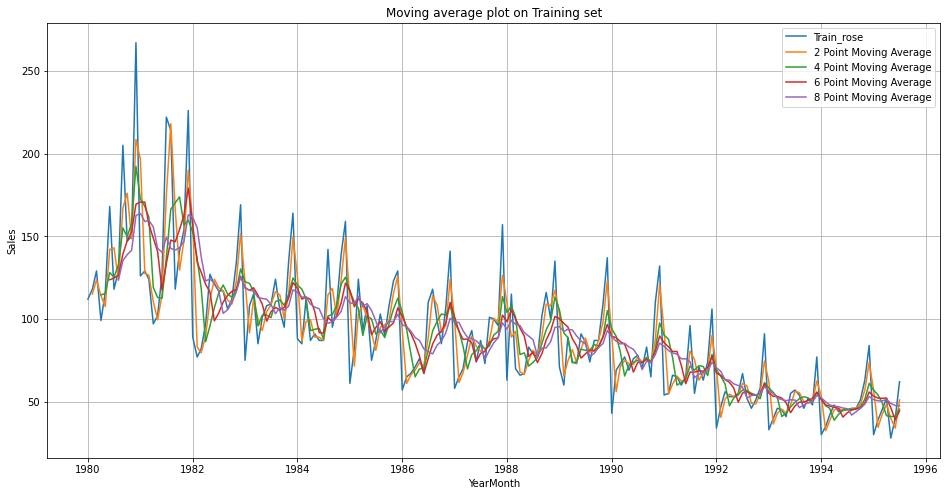

In [144]:
plt.plot(MovingAverage_rose['Rose'], label='Train_rose')
plt.plot(MovingAverage_rose['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_8'],label = '8 Point Moving Average')

plt.legend(loc = 'best')
plt.title('Moving average plot on Training set')
plt.xlabel('YearMonth')
plt.ylabel('Sales')
plt.grid();

In [145]:
trailing_MovingAverage_train_rose = MovingAverage_rose[0:int(len(MovingAverage_rose)*0.71)] 
trailing_MovingAverage_test_rose = MovingAverage_rose[int(len(MovingAverage_rose)*0.71):]

In [146]:
trailing_MovingAverage_train_rose.shape

(132, 5)

In [147]:
trailing_MovingAverage_test_rose.shape

(55, 5)

In [148]:
print('MovingAverage train first five records','\n', trailing_MovingAverage_train_rose.head())
print('\n')
print('MovingAverage train last five records','\n', trailing_MovingAverage_train_rose.tail())
print('\n')
print('MovingAverage test first five records','\n', trailing_MovingAverage_test_rose.head())
print('\n')
print('MovingAverage test last five records','\n', trailing_MovingAverage_test_rose.tail())

MovingAverage train first five records 
              Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_8
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN


MovingAverage train last five records 
              Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_8
YearMonth                                                        
1990-08-01   70.0        74.0       73.25   73.833333      69.375
1990-09-01   83.0        76.5       76.75   75.500000      74.375
1990-10-01   65.0        74.0       74.00   73.500000      73.875
1990-11-01  110.0        87.5       82.00   80.333333      78.500
1990-12-01  132.0       121.0       97.50   89.666667      

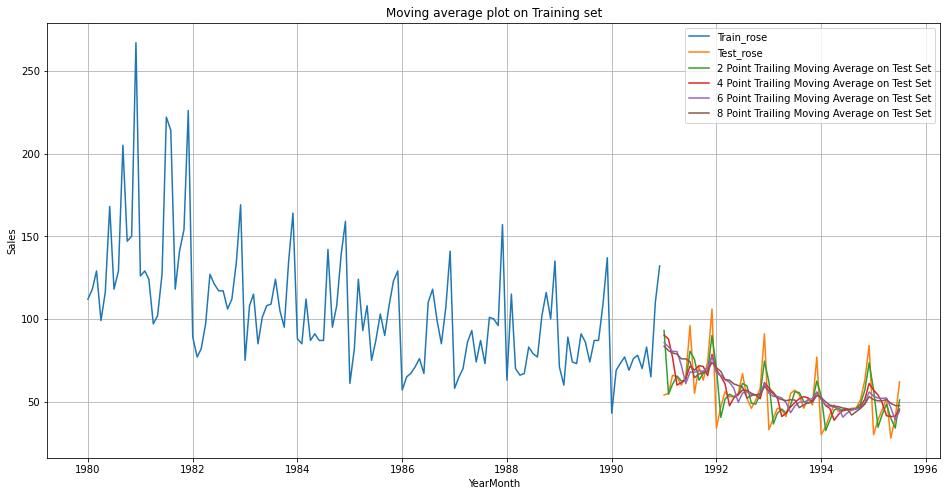

In [150]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train_rose['Rose'], label='Train_rose')
plt.plot(trailing_MovingAverage_test_rose['Rose'], label='Test_rose')

plt.plot(trailing_MovingAverage_test_rose['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_8'],label = '8 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.title('Moving average plot on Training set')
plt.xlabel('YearMonth')
plt.ylabel('Sales')

plt.grid();

In [201]:
rmse_MA2_test_rose = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the rose Test Data,  RMSE is %3.3f" %(rmse_MA2_test_rose))

rmse_MA4_test_rose = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the rose Test Data,  RMSE is %3.3f" %(rmse_MA4_test_rose))

rmse_MA6_test_rose = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the rose Test Data,  RMSE is %3.3f" %(rmse_MA6_test_rose))

rmse_MA8_test_rose = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_8'],squared=False)
print("For 8 point Moving Average Model forecast on the rose Test Data,  RMSE is %3.3f" %(rmse_MA8_test_rose))

For 2 point Moving Average Model forecast on the rose Test Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the rose Test Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the rose Test Data,  RMSE is 14.568
For 8 point Moving Average Model forecast on the rose Test Data,  RMSE is 14.807


In [202]:
resultsDf_MA_rose = pd.DataFrame({'Test RMSE': [rmse_MA2_test_rose,rmse_MA4_test_rose
                                          ,rmse_MA6_test_rose,rmse_MA8_test_rose]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','8pointTrailingMovingAverage'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_MA_rose])
resultsDf_rose

Test RMSE
RegressionOnTime             15.269416
NaiveModel                   79.718824
SimpleAverageModel           53.460645
2pointTrailingMovingAverage  11.529409
4pointTrailingMovingAverage  14.450661
6pointTrailingMovingAverage  14.567606
8pointTrailingMovingAverage  14.807035

#### 5) Simple exponential smoothing

In [154]:
SES_train_rose = train_rose.copy()
SES_test_rose = test_rose.copy()

In [155]:
model_SES_rose = SimpleExpSmoothing(SES_train_rose, initialization_method='estimated')
model_SES_autofit_rose = model_SES_rose.fit(optimized=True)

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [156]:
model_SES_autofit_rose.params

{'smoothing_level': 0.09874933517484011,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38703609891138,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Smoothing parameter is close to 0, forecasts will farther from the actual values

In [158]:
SES_predict_rose = model_SES_autofit_rose.forecast(steps=len(test_rose))
SES_predict_rose

1991-01-01    87.104984
1991-02-01    87.104984
1991-03-01    87.104984
1991-04-01    87.104984
1991-05-01    87.104984
1991-06-01    87.104984
1991-07-01    87.104984
1991-08-01    87.104984
1991-09-01    87.104984
1991-10-01    87.104984
1991-11-01    87.104984
1991-12-01    87.104984
1992-01-01    87.104984
1992-02-01    87.104984
1992-03-01    87.104984
1992-04-01    87.104984
1992-05-01    87.104984
1992-06-01    87.104984
1992-07-01    87.104984
1992-08-01    87.104984
1992-09-01    87.104984
1992-10-01    87.104984
1992-11-01    87.104984
1992-12-01    87.104984
1993-01-01    87.104984
1993-02-01    87.104984
1993-03-01    87.104984
1993-04-01    87.104984
1993-05-01    87.104984
1993-06-01    87.104984
1993-07-01    87.104984
1993-08-01    87.104984
1993-09-01    87.104984
1993-10-01    87.104984
1993-11-01    87.104984
1993-12-01    87.104984
1994-01-01    87.104984
1994-02-01    87.104984
1994-03-01    87.104984
1994-04-01    87.104984
1994-05-01    87.104984
1994-06-01    87

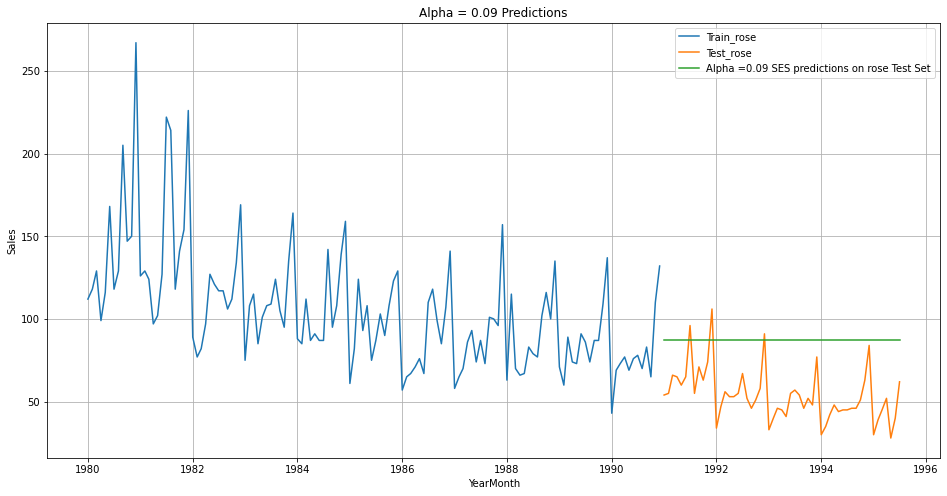

In [159]:
plt.plot(train_rose, label='Train_rose')
plt.plot(test_rose, label='Test_rose')

plt.plot(SES_predict_rose, label='Alpha =0.09 SES predictions on rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09 Predictions')
plt.xlabel('YearMonth')
plt.ylabel('Sales');

In [203]:
rmse_SES_test_rose = metrics.mean_squared_error(test_rose['Rose'],SES_predict_rose.values,squared=False)
print("For SES model on the Test Data,  RMSE is %3.3f" %(rmse_SES_test_rose))

For SES model on the Test Data,  RMSE is 36.796


In [204]:
resultsDf_SES_rose = pd.DataFrame({'Test RMSE': [rmse_SES_test_rose]}
                           ,index=['SESModel'])

In [206]:
resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_SES_rose])
resultsDf_rose

Test RMSE
RegressionOnTime             15.269416
NaiveModel                   79.718824
SimpleAverageModel           53.460645
2pointTrailingMovingAverage  11.529409
4pointTrailingMovingAverage  14.450661
6pointTrailingMovingAverage  14.567606
8pointTrailingMovingAverage  14.807035
SESModel                     36.796338

#### 6) Double exponential smoothing

In [160]:
DES_train_rose = train_rose.copy()
DES_test_rose = test_rose.copy()

In [161]:
model_DES_rose = Holt(train_rose,initialization_method='estimated')
model_DES_rose = model_DES_rose.fit()

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [162]:
model_DES_rose.params

{'smoothing_level': 1.9086427682180844e-08,
 'smoothing_trend': 7.302464353829351e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81629861505857,
 'initial_trend': -0.4943753249082896,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [165]:
DES_predict_rose =  model_DES_rose.forecast(len(test_rose))
DES_predict_rose

1991-01-01    72.064380
1991-02-01    71.570005
1991-03-01    71.075630
1991-04-01    70.581254
1991-05-01    70.086879
1991-06-01    69.592504
1991-07-01    69.098128
1991-08-01    68.603753
1991-09-01    68.109378
1991-10-01    67.615002
1991-11-01    67.120627
1991-12-01    66.626252
1992-01-01    66.131877
1992-02-01    65.637501
1992-03-01    65.143126
1992-04-01    64.648751
1992-05-01    64.154375
1992-06-01    63.660000
1992-07-01    63.165625
1992-08-01    62.671249
1992-09-01    62.176874
1992-10-01    61.682499
1992-11-01    61.188123
1992-12-01    60.693748
1993-01-01    60.199373
1993-02-01    59.704997
1993-03-01    59.210622
1993-04-01    58.716247
1993-05-01    58.221871
1993-06-01    57.727496
1993-07-01    57.233121
1993-08-01    56.738745
1993-09-01    56.244370
1993-10-01    55.749995
1993-11-01    55.255619
1993-12-01    54.761244
1994-01-01    54.266869
1994-02-01    53.772493
1994-03-01    53.278118
1994-04-01    52.783743
1994-05-01    52.289367
1994-06-01    51

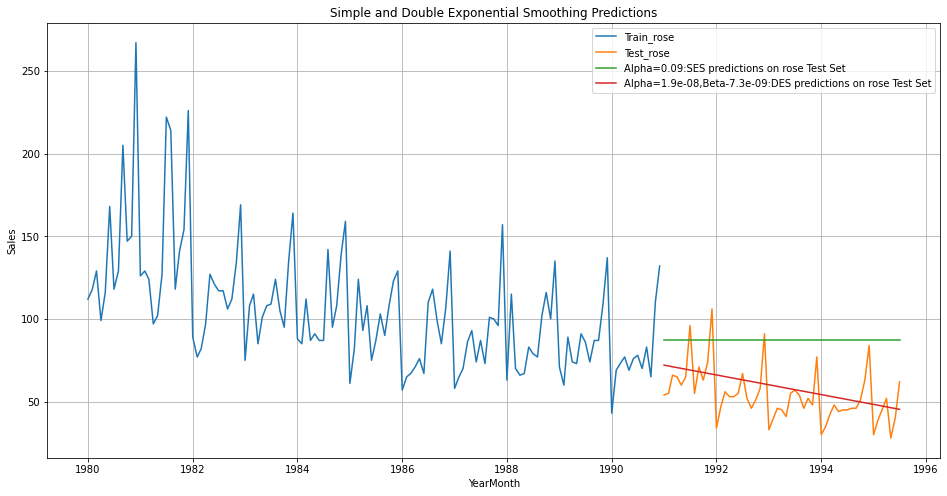

In [164]:
plt.plot(train_rose, label='Train_rose')
plt.plot(test_rose, label='Test_rose')

plt.plot(SES_predict_rose, label='Alpha=0.09:SES predictions on rose Test Set')
plt.plot(DES_predict_rose, label='Alpha=1.9e-08,Beta-7.3e-09:DES predictions on rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions')
plt.xlabel('YearMonth')
plt.ylabel('Sales');

In [207]:
rmse_DES_test_rose = metrics.mean_squared_error(test_rose['Rose'],DES_predict_rose.values,squared=False)
print("For SES model on the Test Data,  RMSE is %3.3f" %(rmse_DES_test_rose))

For SES model on the Test Data,  RMSE is 15.270


In [208]:
resultsDf_DES_rose = pd.DataFrame({'Test RMSE': [rmse_DES_test_rose]}
                           ,index=['DESModel'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_DES_rose])
resultsDf_rose

Test RMSE
RegressionOnTime             15.269416
NaiveModel                   79.718824
SimpleAverageModel           53.460645
2pointTrailingMovingAverage  11.529409
4pointTrailingMovingAverage  14.450661
6pointTrailingMovingAverage  14.567606
8pointTrailingMovingAverage  14.807035
SESModel                     36.796338
DESModel                     15.269789

#### 7) Triple exponential smoothing

In [166]:
TES_train_rose = train_rose.copy()
TES_test_rose = test_rose.copy()

In [167]:
model_TES_rose = ExponentialSmoothing(train_rose,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES_rose = model_TES_rose.fit()

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [168]:
model_TES_rose.params

{'smoothing_level': 0.08830330642635406,
 'smoothing_trend': 6.730635331927582e-05,
 'smoothing_seasonal': 0.004455138229351625,
 'damping_trend': nan,
 'initial_level': 146.88752868155674,
 'initial_trend': -0.5492163940406024,
 'initial_seasons': array([-31.12207537, -18.81171138, -10.86052241, -21.52235816,
        -12.68359535,  -7.17529564,   2.7456236 ,   8.84900094,
          4.85724354,   2.9520333 ,  21.05004912,  63.29916317]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

All the parameters changed, alpha from , beta from 

In [169]:
TES_predict_rose =  model_TES_rose.forecast(len(test_rose))
TES_predict_rose

1991-01-01     42.672382
1991-02-01     54.439917
1991-03-01     61.841877
1991-04-01     50.636896
1991-05-01     58.918913
1991-06-01     63.870294
1991-07-01     73.240626
1991-08-01     78.790723
1991-09-01     74.257853
1991-10-01     71.805821
1991-11-01     89.354796
1991-12-01    131.072194
1992-01-01     36.081787
1992-02-01     47.849323
1992-03-01     55.251283
1992-04-01     44.046301
1992-05-01     52.328318
1992-06-01     57.279699
1992-07-01     66.650031
1992-08-01     72.200129
1992-09-01     67.667259
1992-10-01     65.215226
1992-11-01     82.764201
1992-12-01    124.481599
1993-01-01     29.491193
1993-02-01     41.258728
1993-03-01     48.660688
1993-04-01     37.455706
1993-05-01     45.737724
1993-06-01     50.689105
1993-07-01     60.059436
1993-08-01     65.609534
1993-09-01     61.076664
1993-10-01     58.624632
1993-11-01     76.173607
1993-12-01    117.891005
1994-01-01     22.900598
1994-02-01     34.668134
1994-03-01     42.070093
1994-04-01     30.865112


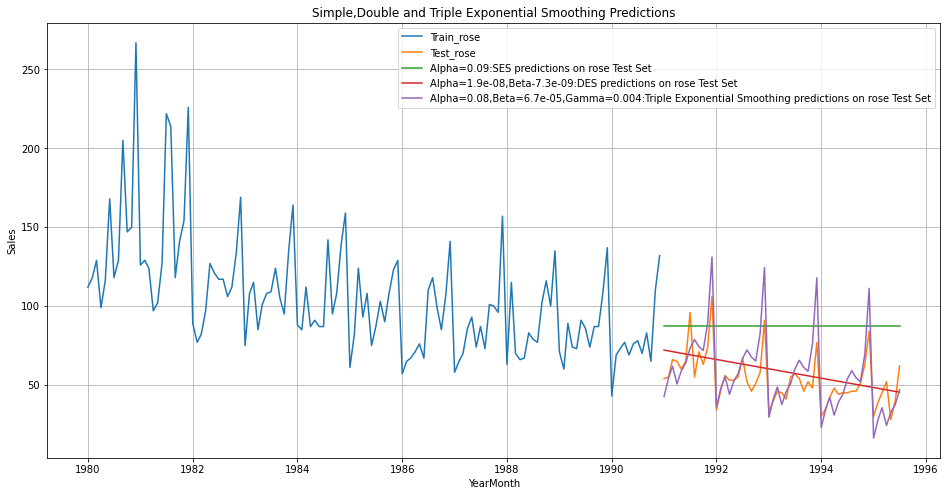

In [170]:
plt.plot(train_rose, label='Train_rose')
plt.plot(test_rose, label='Test_rose')

plt.plot(SES_predict_rose, label='Alpha=0.09:SES predictions on rose Test Set')
plt.plot(DES_predict_rose, label='Alpha=1.9e-08,Beta-7.3e-09:DES predictions on rose Test Set')
plt.plot(TES_predict_rose, label='Alpha=0.08,Beta=6.7e-05,Gamma=0.004:Triple Exponential Smoothing predictions on rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions')
plt.xlabel('YearMonth')
plt.ylabel('Sales');

In [209]:
rmse_TES_test_rose = metrics.mean_squared_error(test_rose['Rose'],TES_predict_rose.values,squared=False)
print("For SES model on the Test Data,  RMSE is %3.3f" %(rmse_TES_test_rose))

For SES model on the Test Data,  RMSE is 14.264


In [213]:
resultsDf_TES_rose = pd.DataFrame({'Test RMSE': [rmse_TES_test_rose]}
                           ,index=['TESModel'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_TES_rose])
resultsDf_rose

Test RMSE
RegressionOnTime             15.269416
NaiveModel                   79.718824
SimpleAverageModel           53.460645
2pointTrailingMovingAverage  11.529409
4pointTrailingMovingAverage  14.450661
6pointTrailingMovingAverage  14.567606
8pointTrailingMovingAverage  14.807035
SESModel                     36.796338
DESModel                     15.269789
TESModel                     14.263638

In [212]:
resultsDf_rose.drop('TESModel', inplace=True)

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. 
## If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. 
## Note: Stationarity should be checked at alpha = 0.05.
3


### Sparkling

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.


In [174]:
from statsmodels.tsa.stattools import adfuller

In [175]:
df_stat_spark = adfuller(df_spark,regression='ct')
print('DF test statistic is %3.3f' %df_stat_spark[0])
print('DF test p-value is' ,df_stat_spark[1])
print('Number of lags used' ,df_stat_spark[2])

DF test statistic is -1.798
DF test p-value is 0.705595845993254
Number of lags used 12


p-value is greater than 0.05, i.e., 0.67. We fail to reject the null hypothesis. We see that at 5% significant level the Time Series is non-stationary.

In [178]:
df_stationarity_spark = adfuller(df_spark.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %df_stationarity_spark[0])
print('DF test p-value is' ,df_stationarity_spark[1])
print('Number of lags used' ,df_stationarity_spark[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


p-value is less than 0.05. Now, let us go ahead and plot the stationary series.

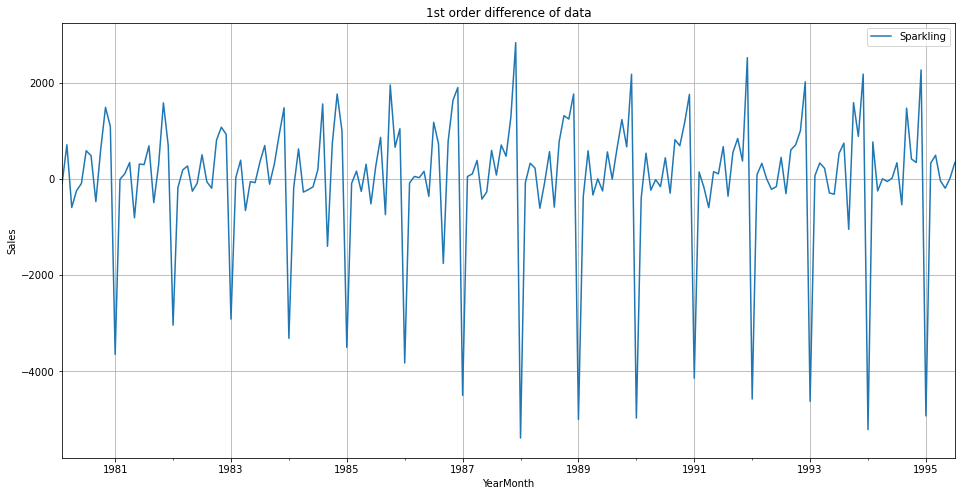

In [180]:
df_spark.diff().dropna().plot(grid=True)
plt.title('1st order difference of data')
plt.ylabel('Sales');

### Rose

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.


In [181]:
df_stat_rose = adfuller(df_rose,regression='ct')
print('DF test statistic is %3.3f' %df_stat_rose[0])
print('DF test p-value is' ,df_stat_rose[1])
print('Number of lags used' ,df_stat_rose[2])

DF test statistic is -2.240
DF test p-value is 0.4675416978196642
Number of lags used 13


p-value is greater than 0.05, i.e., 0.46. We fail to reject the null hypothesis. We see that at 5% significant level the Time Series is non-stationary.

In [127]:
df_stationarity_rose = adfuller(df_rose.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %df_stationarity_rose[0])
print('DF test p-value is' ,df_stationarity_rose[1])
print('Number of lags used' ,df_stationarity_rose[2])

DF test statistic is -8.162
DF test p-value is 3.0125343211338084e-11
Number of lags used 12


p-value is less than 0.05. Now, let us go ahead and plot the stationary series.

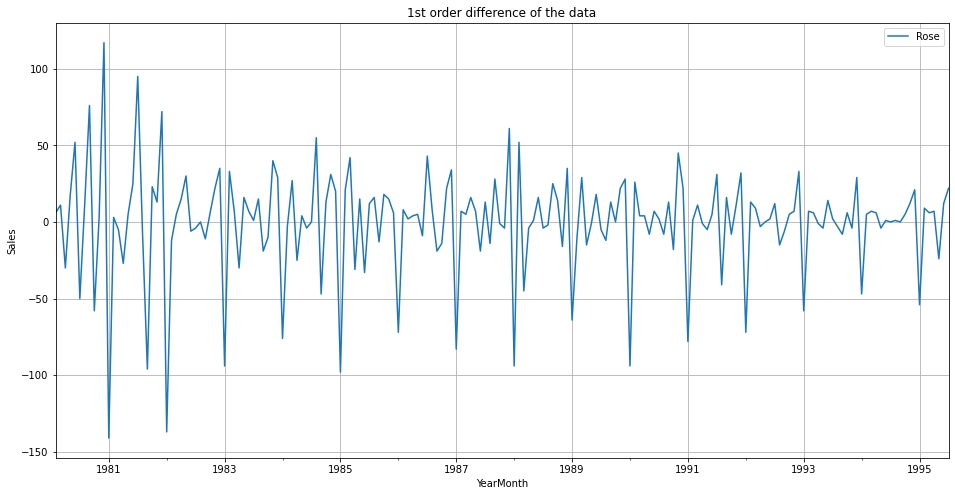

In [183]:
df_rose.diff().dropna().plot(grid=True)
plt.title('1st order difference of the data')
plt.ylabel('Sales');

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.
8


### Sparkling

Let us plot ACF, PACF plot on whole data set to decide range of p and q values

In [129]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

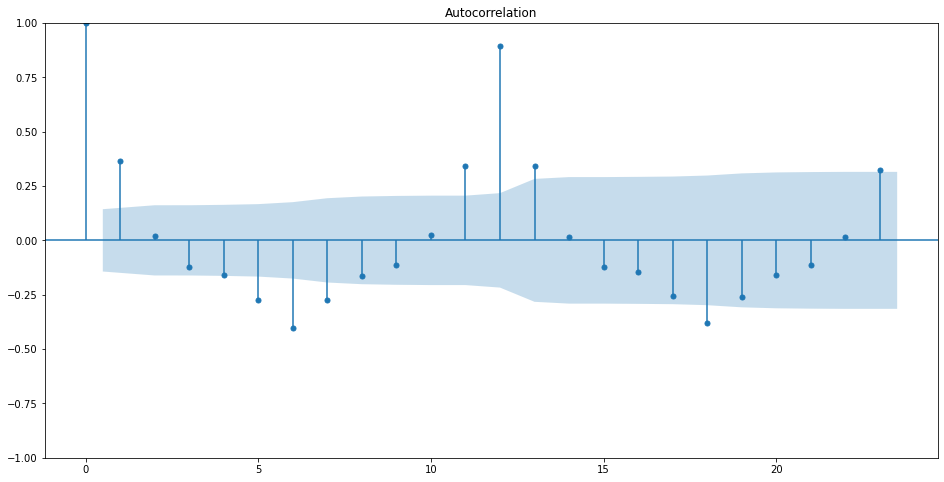

In [133]:
plot_acf(df_spark,alpha=0.05);

q= 1 \
Seasonality occuring every year, so d= 12

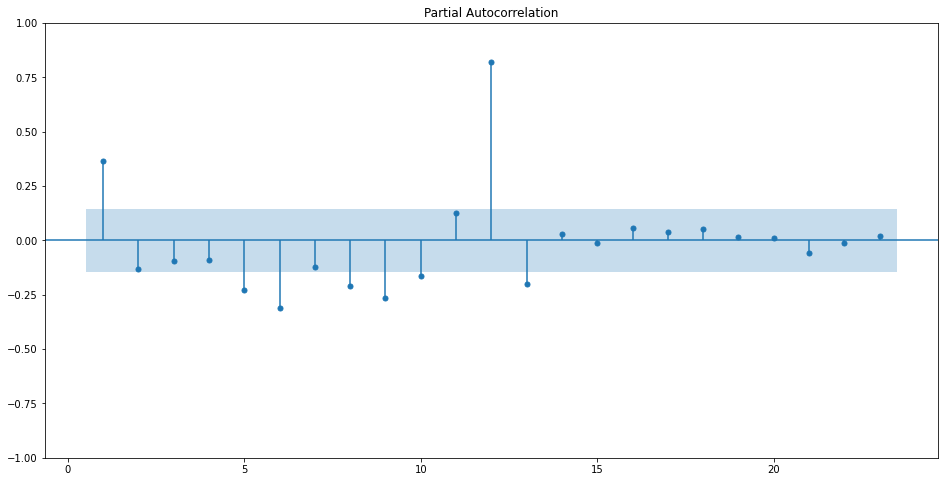

In [134]:
plot_pacf(df_spark,zero=False,alpha=0.05, method='ywmle');

p=1

#### ARIMA model

In [184]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Different parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Different parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [187]:
ARIMA_AIC_spark = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_spark

Empty DataFrame
Columns: [param, AIC]
Index: []

In [188]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model_spark = ARIMA(train_spark['Sparkling'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model_spark.aic))
    ARIMA_AIC_spark = ARIMA_AIC_spark.append({'param':param, 'AIC': ARIMA_model_spark.aic}, ignore_index=True)


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0) - AIC:2267.6630357855465


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1132305158.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_spark = ARIMA_AIC_spark.append({'param':param, 'AIC': ARIMA_model_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\

ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323130674
ARIMA(0, 1, 3) - AIC:2233.9948577624864
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946742404


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1132305158.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_spark = ARIMA_AIC_spark.append({'param':param, 'AIC': ARIMA_model_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\

ARIMA(1, 1, 2) - AIC:2234.527200452325
ARIMA(1, 1, 3) - AIC:2235.607812178285
ARIMA(2, 1, 0) - AIC:2260.365743968097


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1132305158.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_spark = ARIMA_AIC_spark.append({'param':param, 'AIC': ARIMA_model_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\

ARIMA(2, 1, 1) - AIC:2233.7776262581274
ARIMA(2, 1, 2) - AIC:2213.5092126110794


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1132305158.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_spark = ARIMA_AIC_spark.append({'param':param, 'AIC': ARIMA_model_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\

ARIMA(2, 1, 3) - AIC:2232.9861669928914
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498607037124


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1132305158.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_spark = ARIMA_AIC_spark.append({'param':param, 'AIC': ARIMA_model_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\

ARIMA(3, 1, 2) - AIC:2230.753752431717
ARIMA(3, 1, 3) - AIC:2221.4513541225133


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1132305158.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_spark = ARIMA_AIC_spark.append({'param':param, 'AIC': ARIMA_model_spark.aic}, ignore_index=True)


In [189]:
ARIMA_AIC_spark.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2213.509213
15  (3, 1, 3)  2221.451354
14  (3, 1, 2)  2230.753752
11  (2, 1, 3)  2232.986167
9   (2, 1, 1)  2233.777626

In [190]:
auto_ARIMA_spark = ARIMA(train_spark, order=(2,1,2))
results_auto_ARIMA_spark = auto_ARIMA_spark.fit()
print(results_auto_ARIMA_spark.summary())

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 22 Oct 2022   AIC                           2213.509
Time:                        18:56:23   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.214      0.0

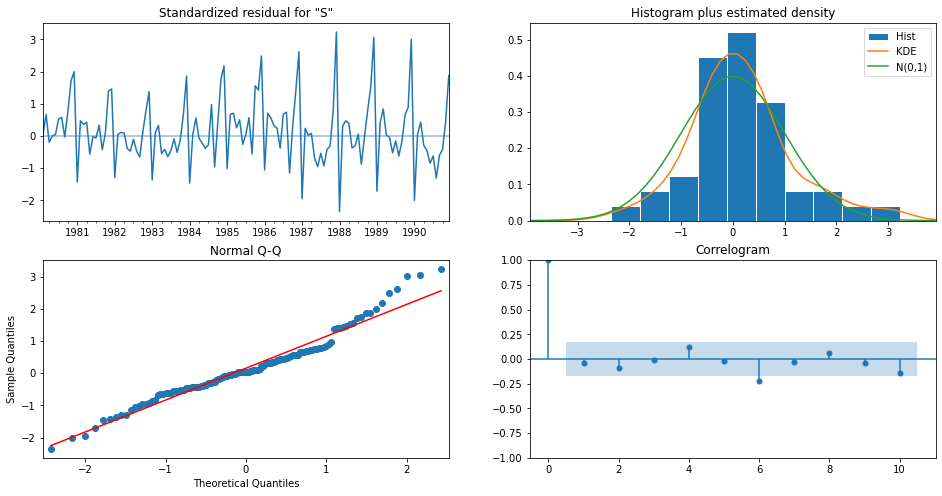

In [236]:
results_auto_ARIMA_spark.plot_diagnostics();

In [191]:
predicted_auto_ARIMA_spark = results_auto_ARIMA_spark.forecast(steps=len(test_spark))

In [192]:
rmse_ARIMA_pdq_test_spark = metrics.mean_squared_error(test_spark['Sparkling'], predicted_auto_ARIMA_spark, squared=False)
print("For ARIMA_pdq model on the Test Data,  RMSE is %3.3f" %(rmse_ARIMA_pdq_test_spark))

For ARIMA_pdq model on the Test Data,  RMSE is 1299.980


In [226]:
resultsDf_ARIMA_pdq = pd.DataFrame({'Test RMSE': [rmse_ARIMA_pdq_test_spark]}
                           ,index=['ARIMA_pdq_Model'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsDf_ARIMA_pdq])
resultsDf_spark

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
8pointTrailingMovingAverage  1342.567772
SESModel                     1338.012144
DESModel                     3949.993290
TESModel                      379.695686
ARIMA_pdq_Model              1299.979524

#### SARIMA model

In [262]:
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [263]:
SARIMA_AIC_spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [264]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model_spark = sm.tsa.statespace.SARIMAX(train_spark['Sparkling'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark = SARIMA_model_spark.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark.aic))
        SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Use

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716293
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536889566


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1863.7845154973377
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC

SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984442702


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.936012243389


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1803.392909490513
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510657


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657978


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.5376425549123
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1748.7622668155266


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC

SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.6879953816529


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.4489858032832


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1725.013875283482
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.162907850583


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC

SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082847


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1876339545129


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:1826.5285286648132
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.573242878703


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC

SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298140362


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093274221413


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 3, 6) - AIC:1737.624323076027


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885105333244


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.771793347059


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6473538896798


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 0, 3, 6) - AIC:1659.2934089143687


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(3, 0, 0, 6) - AIC:1708.1153979379376


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(3, 0, 1, 6) - AIC:1709.0017256096785


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(3, 0, 2, 6) - AIC:1687.1440661354375


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(3, 0, 3, 6) - AIC:1661.2118431531137
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:2187.4410101687026


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC

SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:2087.6843840216056


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1886.115145178558


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(0, 0, 3, 6) - AIC:1794.4778967470218
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:2129.7395689234413


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC

SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1988.4111271161826


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1839.6963226950554


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(1, 0, 3, 6) - AIC:1720.5681581459078


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1791.6537079050836


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1793.6190985079713


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1727.888803670157


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 0, 3, 6) - AIC:1646.4407534133313


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(3, 0, 0, 6) - AIC:1701.671864840833


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(3, 0, 1, 6) - AIC:1703.5807734156194


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(3, 0, 2, 6) - AIC:1707.437464413191


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(3, 0, 3, 6) - AIC:1648.4140421946138


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(0, 0, 0, 6) - AIC:2168.0925408447756


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(0, 0, 1, 6) - AIC:2067.65058366569


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(0, 0, 2, 6) - AIC:1872.715841234381


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(0, 0, 3, 6) - AIC:1780.6423351922274


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(1, 0, 0, 6) - AIC:2128.229114762016


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(1, 0, 1, 6) - AIC:1960.330285915499


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(1, 0, 2, 6) - AIC:1822.6272184544741


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(1, 0, 3, 6) - AIC:1705.0229227348752


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(2, 0, 0, 6) - AIC:1793.6426992015813


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(2, 0, 1, 6) - AIC:1795.6098140417582


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(2, 0, 2, 6) - AIC:1714.6292536205847


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(2, 0, 3, 6) - AIC:1633.3278694246303


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(3, 0, 0, 6) - AIC:1702.7016910781747


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(3, 0, 1, 6) - AIC:1704.6637688704645


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(3, 0, 2, 6) - AIC:1689.1102443397435


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(3, 0, 3, 6) - AIC:1635.054408922968
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:2250.3181267386713


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC

SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:2151.078268308388


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1953.3652245478017


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 0, 3, 6) - AIC:1862.2711147359435
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:2146.1836648562185


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC

SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:2073.9813685256145


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1917.58894682725


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 3, 6) - AIC:1797.1695149446787


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:1813.2423977989392


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1814.8301602829356


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1791.3715257478611


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(2, 0, 3, 6) - AIC:1705.4579651099045


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(3, 0, 0, 6) - AIC:1725.4603199345177


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(3, 0, 1, 6) - AIC:1725.6193732310069


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(3, 0, 2, 6) - AIC:1705.5121039174187


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(3, 0, 3, 6) - AIC:1707.402281375636
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:2204.9340491545727


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC

SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:2103.2471520750296


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1906.3976381403584


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 0, 3, 6) - AIC:1814.6532925059173


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:2109.667120973266


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:2005.5946250050322


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1856.077524347066


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:1736.750528736148


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:1776.9417676956582


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1778.8222558041994


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1743.3797777301284


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 0, 3, 6) - AIC:1660.7244261568544


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:1689.9510871589507


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:1686.5999997257857


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(3, 0, 2, 6) - AIC:1674.4477356337104


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(3, 0, 3, 6) - AIC:1662.6314062195054
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:2188.4633450504666


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC

SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:2089.1320924457254


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1908.3347883585789


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(0, 0, 3, 6) - AIC:1796.473930474744


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:2108.564551026963


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1987.1476987090691


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1838.9755957241725


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 0, 3, 6) - AIC:1722.2230490168636


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:1773.422939283283


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1775.2584003174954


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1727.6786978893217


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 0, 3, 6) - AIC:1645.4883511777093


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(3, 0, 0, 6) - AIC:1688.142124249554


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(3, 0, 1, 6) - AIC:1685.9488856862654


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(3, 0, 2, 6) - AIC:1674.4686023550778


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(3, 0, 3, 6) - AIC:1647.4369304264085


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(0, 0, 0, 6) - AIC:2171.026403977508


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(0, 0, 1, 6) - AIC:2057.318317886775


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(0, 0, 2, 6) - AIC:1859.0976739042937


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(0, 0, 3, 6) - AIC:1782.5266998039945


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(1, 0, 0, 6) - AIC:2093.2030774575046


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(1, 0, 1, 6) - AIC:1956.7268906827921


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(1, 0, 2, 6) - AIC:1817.3470937229931


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(1, 0, 3, 6) - AIC:1701.564935293892


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(2, 0, 0, 6) - AIC:1773.9323623270998


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(2, 0, 1, 6) - AIC:1775.8196088091572


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(2, 0, 2, 6) - AIC:1715.8279837321502


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(2, 0, 3, 6) - AIC:1633.9883770563144


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(3, 0, 0, 6) - AIC:1690.0583850364776


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(3, 0, 1, 6) - AIC:1687.8233865126444


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(3, 0, 2, 6) - AIC:1676.1576189053071


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(3, 0, 3, 6) - AIC:1636.0683787791463
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:2145.3576991201094


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC

SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1945.1561426084254


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(0, 0, 3, 6) - AIC:1851.6846244246328
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:2124.9071786318195


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC

SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:2054.170071228791


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1915.6336922495057


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(1, 0, 3, 6) - AIC:1791.315759004823


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1782.7357821096753


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1782.3598160184708


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1760.3426705875952


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 0, 3, 6) - AIC:1689.605132799711


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(3, 0, 0, 6) - AIC:1693.936035267144


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(3, 0, 1, 6) - AIC:1694.4263554735567


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(3, 0, 2, 6) - AIC:1675.8486269450264


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(3, 0, 3, 6) - AIC:1677.7481190992396


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:2199.8586131454495


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:2103.0859058222895


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:1903.0416542535013


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(0, 0, 3, 6) - AIC:1810.6330100110283


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:2088.133636367894


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:1997.3692882303205


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1852.7863807699155


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 0, 3, 6) - AIC:1731.8625666691623


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1761.2675127039922


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1763.2674869109771


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1744.0407508849487


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:1661.545588480899


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:1676.1994484950144


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:1703.1231125855143


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:1661.2610873589022


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:1663.3299368518185


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2176.868114822319


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:2068.778091106178


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1889.7875403926828


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1797.0726418701308


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:2074.110222247425


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1955.605903496984


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1825.895687321347


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:1714.4018583675477


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1763.2727844647284


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1760.826743717366


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1729.3214253568826


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:1647.2843508202056


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:1676.1266560534048


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:1675.5943017831241


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:1663.5226641735196


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:1652.0082258413966


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:2171.0395872142917


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:2063.5241568926253


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(0, 0, 2, 6) - AIC:1853.1325338568881


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(0, 0, 3, 6) - AIC:1782.6757218202297


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC:2060.2406983840856


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(1, 0, 1, 6) - AIC:1890.9467139883752


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(1, 0, 2, 6) - AIC:1773.595440486791


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(1, 0, 3, 6) - AIC:1710.7615681255315


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(2, 0, 0, 6) - AIC:1759.6048642944045


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(2, 0, 1, 6) - AIC:1763.25610150902


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(2, 0, 2, 6) - AIC:1711.0003661247893


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(2, 0, 3, 6) - AIC:1629.051941933711


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(3, 0, 0, 6) - AIC:1675.6089732086004


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(3, 0, 1, 6) - AIC:1677.6717957123676


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(3, 0, 2, 6) - AIC:1663.5561302060223


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(3, 0, 3, 6) - AIC:1637.8929508551885
SARIMA(3, 1, 0)x(0, 0, 0, 6) - AIC:2208.40250139061


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC

SARIMA(3, 1, 0)x(0, 0, 1, 6) - AIC:2141.8644518455267


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(0, 0, 2, 6) - AIC:1943.9534295666144


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(0, 0, 3, 6) - AIC:1850.949483038988
SARIMA(3, 1, 0)x(1, 0, 0, 6) - AIC:2102.6673948406024


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC

SARIMA(3, 1, 0)x(1, 0, 1, 6) - AIC:2026.7285624689393


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(1, 0, 2, 6) - AIC:1908.6423194622976


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(1, 0, 3, 6) - AIC:1783.0592521570409


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(2, 0, 0, 6) - AIC:1764.6816446607083


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(2, 0, 1, 6) - AIC:1765.3335733964473


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(2, 0, 2, 6) - AIC:1744.0813178262845


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(2, 0, 3, 6) - AIC:1689.4389964524887


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(3, 0, 0, 6) - AIC:1679.2813201535337


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(3, 0, 1, 6) - AIC:1678.3079571621186


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(3, 0, 2, 6) - AIC:1661.386447044874


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(3, 0, 3, 6) - AIC:1663.3676890978663


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(0, 0, 0, 6) - AIC:2188.222098335952


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(0, 0, 1, 6) - AIC:2100.9316371387254


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(0, 0, 2, 6) - AIC:1904.9561307209751


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(0, 0, 3, 6) - AIC:1812.5348964581915


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 0, 0, 6) - AIC:2063.575914678922


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 0, 1, 6) - AIC:1964.5587179984332


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 0, 2, 6) - AIC:1842.4810697558178


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 0, 3, 6) - AIC:1728.5028550367826


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(2, 0, 0, 6) - AIC:1747.8382165891032


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(2, 0, 1, 6) - AIC:1749.8200297400329


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(2, 0, 2, 6) - AIC:1731.230172433988


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(2, 0, 3, 6) - AIC:1663.425427692208


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(3, 0, 0, 6) - AIC:1663.2792328876653


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(3, 0, 1, 6) - AIC:1679.8036143841316


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(3, 0, 2, 6) - AIC:1649.3644945340486


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(3, 0, 3, 6) - AIC:1651.4211626734966


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(0, 0, 0, 6) - AIC:2187.314727198063


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(0, 0, 1, 6) - AIC:2082.1148719800963


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(0, 0, 2, 6) - AIC:1880.8091983895208


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(0, 0, 3, 6) - AIC:1791.2096657219868


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 0, 0, 6) - AIC:2066.145316625608


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 0, 1, 6) - AIC:1946.872757721368


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 0, 2, 6) - AIC:1822.5625722739103


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 0, 3, 6) - AIC:1710.5959365416206


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(2, 0, 0, 6) - AIC:1749.8447751063136


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(2, 0, 1, 6) - AIC:1748.442071248952


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(2, 0, 2, 6) - AIC:1731.242155035245


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(2, 0, 3, 6) - AIC:1652.08507904946


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(3, 0, 0, 6) - AIC:1662.9887500940542


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(3, 0, 1, 6) - AIC:1693.9614851104911


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(3, 0, 2, 6) - AIC:1649.698454401526


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(3, 0, 3, 6) - AIC:1651.1869309928966


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(0, 0, 0, 6) - AIC:2155.774954204717


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(0, 0, 1, 6) - AIC:2053.1966245156445


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(0, 0, 2, 6) - AIC:1912.6738832934134


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(0, 0, 3, 6) - AIC:1771.3180024984565


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(1, 0, 0, 6) - AIC:2068.718760508475


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(1, 0, 1, 6) - AIC:1878.591523024564


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(1, 0, 2, 6) - AIC:1809.882058681999


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(1, 0, 3, 6) - AIC:1693.721922918678


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(2, 0, 0, 6) - AIC:1743.3182322262385


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(2, 0, 1, 6) - AIC:1745.0630654588404


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:1712.9223690110668


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(2, 0, 3, 6) - AIC:1634.6174590459393


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(3, 0, 0, 6) - AIC:1661.1198482946372


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(3, 0, 1, 6) - AIC:1659.2040391589637


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(3, 0, 2, 6) - AIC:1644.9036706909146


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(3, 0, 3, 6) - AIC:1638.4370174510436


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\3732429980.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)


In [265]:
SARIMA_AIC_spark.sort_values(by=['AIC']).head()

param      seasonal          AIC
187  (2, 1, 3)  (2, 0, 3, 6)  1629.051942
59   (0, 1, 3)  (2, 0, 3, 6)  1633.327869
123  (1, 1, 3)  (2, 0, 3, 6)  1633.988377
251  (3, 1, 3)  (2, 0, 3, 6)  1634.617459
63   (0, 1, 3)  (3, 0, 3, 6)  1635.054409

In [266]:
import statsmodels.api as sm

auto_SARIMA_spark = sm.tsa.statespace.SARIMAX(train_spark['Sparkling'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_spark = auto_SARIMA_spark.fit(maxiter=1000)
print(results_auto_SARIMA_spark.summary())

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -803.526
Date:                           Mon, 17 Oct 2022   AIC                           1629.052
Time:                                   22:05:39   BIC                           1658.657
Sample:                               01-01-1980   HQIC                          1641.058
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7438      0.063    -27.736      0.000      -1.867      -1.621
ar.L2         -0.7863      0.068    -11.645

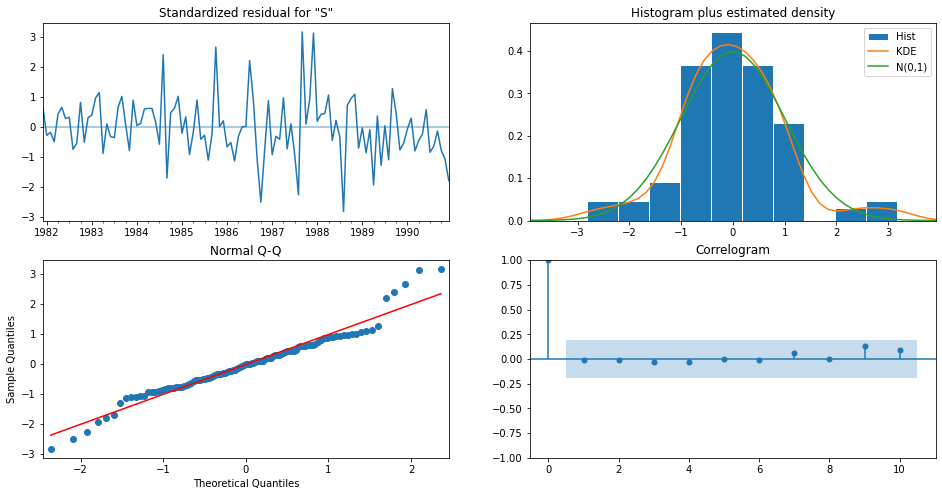

In [267]:
results_auto_SARIMA_spark.plot_diagnostics();

In [268]:
predicted_auto_SARIMA_spark = results_auto_SARIMA_spark.get_forecast(steps=len(test_spark))

In [269]:
predicted_auto_SARIMA_spark.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1342.925186  366.366671     624.859706    2060.990666
1991-02-01   989.544460  384.808334     235.333985    1743.754934
1991-03-01  1646.419333  385.043266     891.748398    2401.090267
1991-04-01  1570.198051  395.761199     794.520354    2345.875748
1991-05-01  1168.877879  395.930564     392.868234    1944.887525

In [270]:
rmse_SARIMA_pdq_test_spark = mean_squared_error(test_spark['Sparkling'],predicted_auto_SARIMA_spark.predicted_mean,squared=False)
print("For SARIMA_pdq model on the Test Data,  RMSE is %3.3f" %(rmse_SARIMA_pdq_test_spark))

For SARIMA_pdq model on the Test Data,  RMSE is 826.660


In [271]:
resultsDf_SARIMA_pdq = pd.DataFrame({'Test RMSE': [rmse_SARIMA_pdq_test_spark]}
                           ,index=['SARIMA_pdq_Model'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsDf_SARIMA_pdq])
resultsDf_spark

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
8pointTrailingMovingAverage  1342.567772
SESModel                     1338.012144
DESModel                     3949.993290
TESModel                      379.695686
ARIMA_pdq_Model              1299.979524
SARIMA_pdq_Model              826.659783

### Rose

Let us plot ACF, PACF plot on whole data set to decide range of p and q values

In [129]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

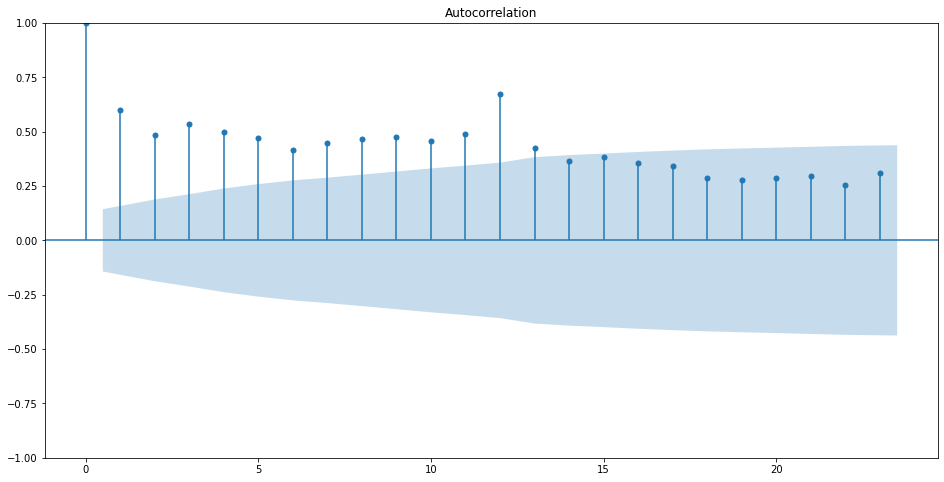

In [272]:
plot_acf(df_rose,alpha=0.05);

q= 0 \
Seasonality occuring every year, so d= 12

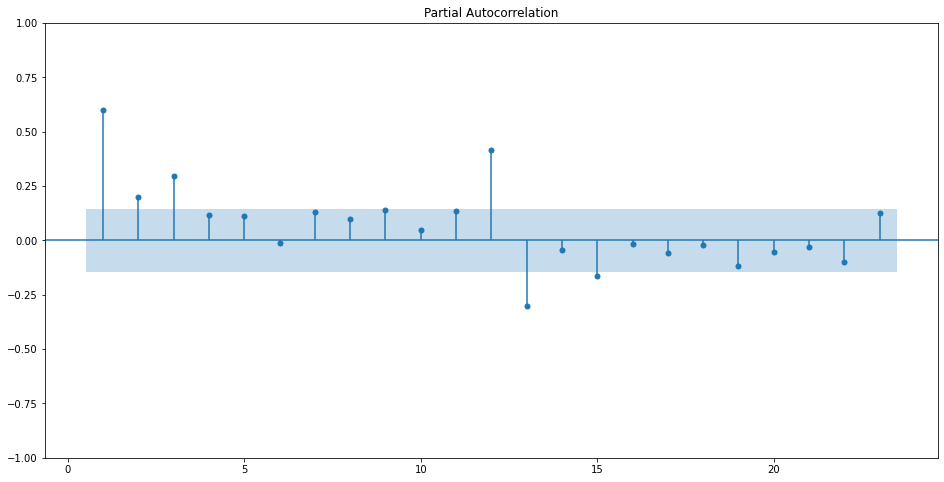

In [273]:
plot_pacf(df_rose,zero=False,alpha=0.05, method='ywmle');

p=3

#### ARIMA model

In [274]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [275]:
ARIMA_AIC_rose = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_rose

Empty DataFrame
Columns: [param, AIC]
Index: []

In [276]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model_rose = ARIMA(train_rose['Rose'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model_rose.aic))
    ARIMA_AIC_rose = ARIMA_AIC_rose.append({'param':param, 'AIC': ARIMA_model_rose.aic}, ignore_index=True)


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\4248924011.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_rose = ARIMA_AIC_rose.append({'param':param, 'AIC': ARIMA_model_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\sit

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.6715288535743


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\4248924011.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_rose = ARIMA_AIC_rose.append({'param':param, 'AIC': ARIMA_model_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 3) - AIC:1280.5453761734657
ARIMA(1, 1, 0) - AIC:1317.3503105381526


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\4248924011.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_rose = ARIMA_AIC_rose.append({'param':param, 'AIC': ARIMA_model_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Tem

ARIMA(1, 1, 1) - AIC:1280.5742295380046


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\4248924011.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_rose = ARIMA_AIC_rose.append({'param':param, 'AIC': ARIMA_model_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2) - AIC:1279.8707234231906


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\4248924011.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_rose = ARIMA_AIC_rose.append({'param':param, 'AIC': ARIMA_model_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 3) - AIC:1281.8707223310007
ARIMA(2, 1, 0) - AIC:1298.6110341604908


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\4248924011.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_rose = ARIMA_AIC_rose.append({'param':param, 'AIC': ARIMA_model_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Tem

ARIMA(2, 1, 1) - AIC:1281.5078621868597
ARIMA(2, 1, 2) - AIC:1281.8707222264215


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\4248924011.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_rose = ARIMA_AIC_rose.append({'param':param, 'AIC': ARIMA_model_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\sit

ARIMA(2, 1, 3) - AIC:1274.695136341693
ARIMA(3, 1, 0) - AIC:1297.4810917271702


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(3, 1, 1) - AIC:1282.419277627203


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\4248924011.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_rose = ARIMA_AIC_rose.append({'param':param, 'AIC': ARIMA_model_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\sit

ARIMA(3, 1, 2) - AIC:1283.720740597714


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\4248924011.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_rose = ARIMA_AIC_rose.append({'param':param, 'AIC': ARIMA_model_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(3, 1, 3) - AIC:1278.6613049048526


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_3524\4248924011.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC_rose = ARIMA_AIC_rose.append({'param':param, 'AIC': ARIMA_model_rose.aic}, ignore_index=True)


In [277]:
ARIMA_AIC_rose.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1274.695136
15  (3, 1, 3)  1278.661305
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [215]:
auto_ARIMA_rose = ARIMA(train_rose, order=(2,1,3))
results_auto_ARIMA_rose = auto_ARIMA_rose.fit()
print(results_auto_ARIMA_rose.summary())

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sat, 22 Oct 2022   AIC                           1274.695
Time:                        21:10:39   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.050      0.000      -1.842      -1.514
ar.L2         -0.7289      0.084     -8.711      0.000      -0.893      -0.565
ma.L1          1.0448      0.662      1.578      0.1

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


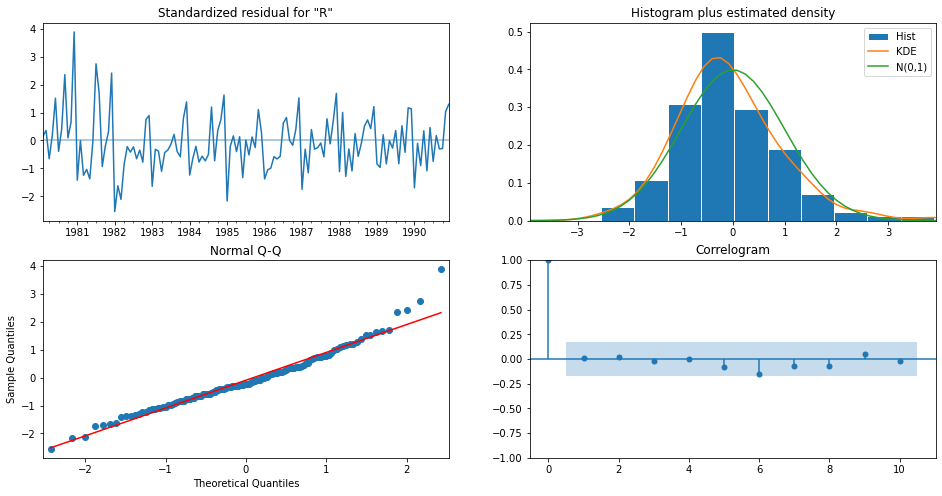

In [279]:
results_auto_ARIMA_rose.plot_diagnostics();

In [229]:
predicted_auto_ARIMA_rose = results_auto_ARIMA_rose.forecast(steps=len(test_rose))

In [230]:
rmse_ARIMA_pdq_test_rose = metrics.mean_squared_error(test_rose['Rose'], predicted_auto_ARIMA_rose, squared=False)
print("For ARIMA_pdq model on the Test Data,  RMSE is %3.3f" %(rmse_ARIMA_pdq_test_rose))

For ARIMA_pdq model on the Test Data,  RMSE is 36.816


In [234]:
resultsDf_ARIMA_pdq_rose = pd.DataFrame({'Test RMSE': [rmse_ARIMA_pdq_test_rose]}
                           ,index=['ARIMA_pdq_Model'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_ARIMA_pdq_rose])
resultsDf_rose

Test RMSE
RegressionOnTime             15.269416
NaiveModel                   79.718824
SimpleAverageModel           53.460645
2pointTrailingMovingAverage  11.529409
4pointTrailingMovingAverage  14.450661
6pointTrailingMovingAverage  14.567606
8pointTrailingMovingAverage  14.807035
SESModel                     36.796338
DESModel                     15.269789
TESModel                     14.263638
ARIMA_pdq_Model              36.815898

In [233]:
resultsDf_rose.drop('ARIMA_pdq_Model', inplace =True)

#### SARIMA model

In [219]:
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [220]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [221]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113856
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827427


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\

SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.2713830625175
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149098


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721962
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.986174312435
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515133


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426305313


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.8048206427447
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.5465834695271


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765139903


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.0425053425804


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.8917095357933
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.383254802955


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752782
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:1021.0943496441135


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745048
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253745872


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.8564124020752


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 3, 6) - AIC:1005.742984863619
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379982137


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.645518770187


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082629488


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(2, 0, 3, 6) - AIC:965.0642493701034


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(3, 0, 0, 6) - AIC:1033.873915726168


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(3, 0, 1, 6) - AIC:1020.2937192107521


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(3, 0, 2, 6) - AIC:1007.9773110137162


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(3, 0, 3, 6) - AIC:967.0624883856624
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:1251.6675430541047
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:1192.0017194563113


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1081.8324069561372
SARIMA(0, 1, 2)x(0, 0, 3, 6) - AIC:1004.1787326539682


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:1222.0132244495624
SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1153.8519348207305


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1061.4359846049492
SARIMA(0, 1, 2)x(1, 0, 3, 6) - AIC:998.7289439241715
SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1089.0244978807673


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1090.226507190937


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1043.6002611507186


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(2, 0, 3, 6) - AIC:961.2354913132879


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(3, 0, 0, 6) - AIC:1020.8252047774434


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(3, 0, 1, 6) - AIC:1007.8414719713198


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(3, 0, 2, 6) - AIC:1002.4818931008444


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 2)x(3, 0, 3, 6) - AIC:963.0737324449714
SARIMA(0, 1, 3)x(0, 0, 0, 6) - AIC:1243.9501216739081
SARIMA(0, 1, 3)x(0, 0, 1, 6) - AIC:1183.3699555830938


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(0, 1, 3)x(0, 0, 2, 6) - AIC:1075.3558340399484


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(0, 0, 3, 6) - AIC:998.0561578612218
SARIMA(0, 1, 3)x(1, 0, 0, 6) - AIC:1221.1933435510757


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(0, 1, 3)x(1, 0, 1, 6) - AIC:1140.8885775851236
SARIMA(0, 1, 3)x(1, 0, 2, 6) - AIC:1055.5401877874792


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(0, 1, 3)x(1, 0, 3, 6) - AIC:992.1840428801155
SARIMA(0, 1, 3)x(2, 0, 0, 6) - AIC:1089.6207835479722


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(0, 1, 3)x(2, 0, 1, 6) - AIC:1091.30987772278


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(2, 0, 2, 6) - AIC:1033.5130631703164


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(2, 0, 3, 6) - AIC:952.0736322160107


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(3, 0, 0, 6) - AIC:1022.0360500208642


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(3, 0, 1, 6) - AIC:1008.5076655303337


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(3, 0, 2, 6) - AIC:1001.8916164643485


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 3)x(3, 0, 3, 6) - AIC:954.0491617377473
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:1249.8763225267332
SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1135.5498105815752


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(1, 1, 0)x(0, 0, 3, 6) - AIC:1069.5311362020764
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:1250.6246888229598
SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:1230.6009595917888


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1133.8029696526646


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 3, 6) - AIC:1047.7441478992173
SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:1123.283014898011
SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1120.9425392417086


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1105.9092655262768
SARIMA(1, 1, 0)x(2, 0, 3, 6) - AIC:1044.7054444344506
SARIMA(1, 1, 0)x(3, 0, 0, 6) - AIC:1056.3609106599702


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(1, 1, 0)x(3, 0, 1, 6) - AIC:1047.263498391739


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(3, 0, 2, 6) - AIC:1048.2388528829583


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(3, 0, 3, 6) - AIC:1044.9201178035482
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:1262.1840064255507
SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:1201.5037144424366


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1093.6044317606397
SARIMA(1, 1, 1)x(0, 0, 3, 6) - AIC:1016.7345933690376


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:1213.6233143130967


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:1162.4240004378619
SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1083.2585834383679


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:1003.9567058452132
SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:1083.900691126698


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1083.1711266750629


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1052.7784697281713


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(2, 0, 3, 6) - AIC:963.6530363741658


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:1017.9974834538135


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:1021.0487743445196


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(3, 0, 2, 6) - AIC:1006.9933719485261


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(3, 0, 3, 6) - AIC:966.278519171121
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:1251.9495040706277


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:1193.2804057587398


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1083.8066266630808


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(0, 0, 3, 6) - AIC:1010.2260980983025
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:1213.218395375263


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1155.4829113179126


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1061.342843795071


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(1, 0, 3, 6) - AIC:996.4951475686574
SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:1081.9393759714503


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1091.7082804188012


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1041.655817439052


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(2, 0, 3, 6) - AIC:962.1627432586452


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(3, 0, 0, 6) - AIC:1030.0966656849173


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(3, 0, 1, 6) - AIC:1020.9030817357066


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(3, 0, 2, 6) - AIC:1006.4311858913092


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 2)x(3, 0, 3, 6) - AIC:964.1387676769747
SARIMA(1, 1, 3)x(0, 0, 0, 6) - AIC:1245.546312531601


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(1, 1, 3)x(0, 0, 1, 6) - AIC:1177.8357166462588


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(0, 0, 2, 6) - AIC:1071.873688342599


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(0, 0, 3, 6) - AIC:996.2173709719572


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(1, 0, 0, 6) - AIC:1207.890212196453


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(1, 0, 1, 6) - AIC:1141.493191634284


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(1, 0, 2, 6) - AIC:1048.4718515020222


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(1, 0, 3, 6) - AIC:989.9414719593549


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(2, 0, 0, 6) - AIC:1081.0116601865013


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(2, 0, 1, 6) - AIC:1083.985564216822


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(2, 0, 2, 6) - AIC:1035.2464631825414


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(2, 0, 3, 6) - AIC:953.6849506686882


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(3, 0, 0, 6) - AIC:1028.1858819454305


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(3, 0, 1, 6) - AIC:1019.732448989561


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(3, 0, 2, 6) - AIC:1007.7128268993174


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 3)x(3, 0, 3, 6) - AIC:955.6592575499487
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:1231.9630734540447
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1128.9876565220648


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(2, 1, 0)x(0, 0, 3, 6) - AIC:1058.6689517710347
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:1219.0664587882736


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:1186.6130717491192
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1111.6702480689985


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(2, 1, 0)x(1, 0, 3, 6) - AIC:1044.3478369703498
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1099.0398509026213


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1093.0537127081238


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1078.6114741590402


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(2, 0, 3, 6) - AIC:1026.2970646212689
SARIMA(2, 1, 0)x(3, 0, 0, 6) - AIC:1003.6760779292606


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(2, 1, 0)x(3, 0, 1, 6) - AIC:1004.5290918309707


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(3, 0, 2, 6) - AIC:994.9874170287425


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 0)x(3, 0, 3, 6) - AIC:997.0369947126378
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:1263.231523179766
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:1201.4126986467888


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:1092.4754616553778
SARIMA(2, 1, 1)x(0, 0, 3, 6) - AIC:1018.2581405074119
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:1199.8335862393978


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:1161.5686919134014


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1079.818870338562


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(1, 0, 3, 6) - AIC:1003.754115748035
SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1071.6995915092232


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1068.478162738773


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1051.6734607523913


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:965.176395748737


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:974.1258778648116


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:975.8068385702255


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:967.6521340088652


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:967.1740904690577
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1253.9102116146728


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1185.7691922509275


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1082.5581033340281


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1005.4894643085906
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1200.4217492510832


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1150.7283708902291


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.110321621597


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:996.8723966467084


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.6961457808366


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.077179892612


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.220637205394


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:961.06598120703


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:975.6133309442363


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:977.0520560410996


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:962.9964602737757


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:962.7649517576643


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:1237.870182429518
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:1174.151682113594


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(2, 1, 3)x(0, 0, 2, 6) - AIC:1077.0677580069168


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(0, 0, 3, 6) - AIC:995.7578104348431


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC:1185.2892266599524


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(1, 0, 1, 6) - AIC:1125.9720320582653


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(1, 0, 2, 6) - AIC:1055.0790865154436


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(1, 0, 3, 6) - AIC:991.6948245974065


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(2, 0, 0, 6) - AIC:1074.3352770239505


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(2, 0, 1, 6) - AIC:1065.399243621368


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(2, 0, 2, 6) - AIC:1026.6825054152202


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(2, 0, 3, 6) - AIC:951.744297022717


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(3, 0, 0, 6) - AIC:976.9942656150985


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(3, 0, 1, 6) - AIC:978.2974710465343


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(3, 0, 2, 6) - AIC:961.6341232701345


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(2, 1, 3)x(3, 0, 3, 6) - AIC:953.2056508139697
SARIMA(3, 1, 0)x(0, 0, 0, 6) - AIC:1269.8130062641508
SARIMA(3, 1, 0)x(0, 0, 1, 6) - AIC:1231.0483564306642
SARIMA(3, 1, 0)x(0, 0, 2, 6) - AIC:1118.5942596319196


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(3, 1, 0)x(0, 0, 3, 6) - AIC:1044.5526530822337
SARIMA(3, 1, 0)x(1, 0, 0, 6) - AIC:1208.6291501251628


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(3, 1, 0)x(1, 0, 1, 6) - AIC:1176.6540329798738


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(1, 0, 2, 6) - AIC:1109.7809399881469


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(1, 0, 3, 6) - AIC:1034.9201475014258
SARIMA(3, 1, 0)x(2, 0, 0, 6) - AIC:1079.2853822014988


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(3, 1, 0)x(2, 0, 1, 6) - AIC:1072.8138748481178


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(2, 0, 2, 6) - AIC:1066.9903339586408


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(2, 0, 3, 6) - AIC:1020.7503988348478
SARIMA(3, 1, 0)x(3, 0, 0, 6) - AIC:984.7336162283945


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(3, 1, 0)x(3, 0, 1, 6) - AIC:986.6501812858966


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(3, 0, 2, 6) - AIC:985.1049146777311


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 0)x(3, 0, 3, 6) - AIC:983.3161299224256
SARIMA(3, 1, 1)x(0, 0, 0, 6) - AIC:1255.0658180709434


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(3, 1, 1)x(0, 0, 1, 6) - AIC:1203.3791901466254


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(3, 1, 1)x(0, 0, 2, 6) - AIC:1092.8506205396084


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(0, 0, 3, 6) - AIC:1019.839452034489
SARIMA(3, 1, 1)x(1, 0, 0, 6) - AIC:1191.6664837666224


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(3, 1, 1)x(1, 0, 1, 6) - AIC:1151.0922764079644


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 0, 2, 6) - AIC:1081.7351636108608


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(1, 0, 3, 6) - AIC:1003.4719491865077
SARIMA(3, 1, 1)x(2, 0, 0, 6) - AIC:1064.672777011498


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(3, 1, 1)x(2, 0, 1, 6) - AIC:1061.247949364226


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(2, 0, 2, 6) - AIC:1044.6266207817425


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(2, 0, 3, 6) - AIC:967.1393179258276


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(3, 0, 0, 6) - AIC:961.7677148937727


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(3, 0, 1, 6) - AIC:962.9689685926522


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(3, 0, 2, 6) - AIC:960.5692246737526


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 1)x(3, 0, 3, 6) - AIC:962.3000016283208
SARIMA(3, 1, 2)x(0, 0, 0, 6) - AIC:1255.9835652919064


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_ro

SARIMA(3, 1, 2)x(0, 0, 1, 6) - AIC:1195.6789886086647


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(0, 0, 2, 6) - AIC:1081.3206160347222


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(0, 0, 3, 6) - AIC:1006.4484959906325


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 0, 0, 6) - AIC:1191.132003181999


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 0, 1, 6) - AIC:1149.0758308487154


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 0, 2, 6) - AIC:1063.0936399842308


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(1, 0, 3, 6) - AIC:994.0381587355324


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(2, 0, 0, 6) - AIC:1065.2478750777489


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(2, 0, 1, 6) - AIC:1055.810148998696


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(2, 0, 2, 6) - AIC:1046.4201346483878


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(2, 0, 3, 6) - AIC:962.4545241175741


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(3, 0, 0, 6) - AIC:963.4445053003418


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(3, 0, 1, 6) - AIC:964.8545584174391


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(3, 0, 2, 6) - AIC:962.569223868385


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 2)x(3, 0, 3, 6) - AIC:964.2706232497897


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(0, 0, 0, 6) - AIC:1243.7385937456452


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(0, 0, 1, 6) - AIC:1176.13924440165


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(0, 0, 2, 6) - AIC:1057.3381198261825


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(0, 0, 3, 6) - AIC:994.1518936237022


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(1, 0, 0, 6) - AIC:1179.1465437667716


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(1, 0, 1, 6) - AIC:1126.6260826486512


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(1, 0, 2, 6) - AIC:1057.3117791834525


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(1, 0, 3, 6) - AIC:982.6950281061975


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(2, 0, 0, 6) - AIC:1044.9852599943042


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(2, 0, 1, 6) - AIC:1054.3672228265402


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:1037.7522200921348


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(2, 0, 3, 6) - AIC:952.5821017597286


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(3, 0, 0, 6) - AIC:964.8364663924278


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(3, 0, 1, 6) - AIC:966.4949786348441


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(3, 0, 2, 6) - AIC:964.5807054251088


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA(3, 1, 3)x(3, 0, 3, 6) - AIC:954.466561373253


C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_5256\1233895317.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)


In [222]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

param      seasonal         AIC
187  (2, 1, 3)  (2, 0, 3, 6)  951.744297
59   (0, 1, 3)  (2, 0, 3, 6)  952.073632
251  (3, 1, 3)  (2, 0, 3, 6)  952.582102
191  (2, 1, 3)  (3, 0, 3, 6)  953.205651
123  (1, 1, 3)  (2, 0, 3, 6)  953.684951

In [225]:
import statsmodels.api as sm

auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -464.872
Date:                           Sat, 22 Oct 2022   AIC                            951.744
Time:                                   21:15:01   BIC                            981.349
Sample:                               01-01-1980   HQIC                           963.750
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5027      0.083     -6.081      0.000      -0.665      -0.341
ar.L2         -0.6628      0.084     -7.918

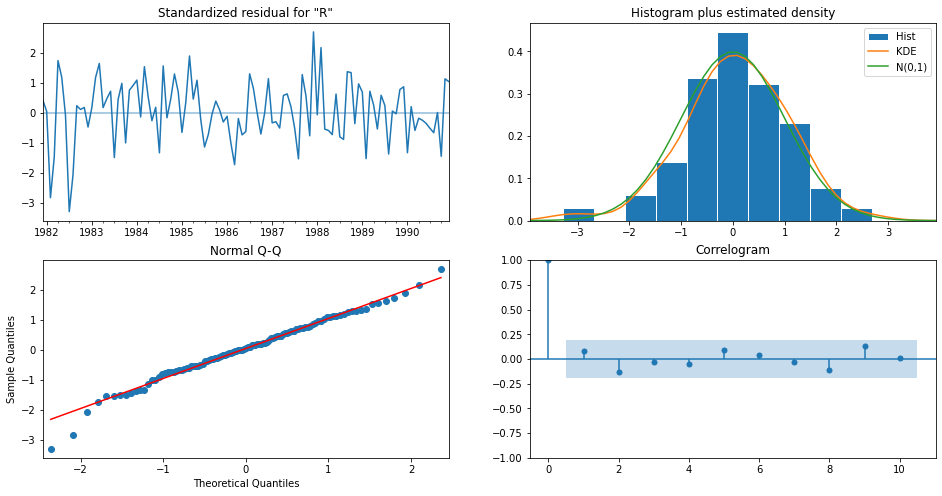

In [288]:
results_auto_SARIMA_rose.plot_diagnostics();

In [226]:
predicted_auto_SARIMA_rose = results_auto_SARIMA_rose.get_forecast(steps=len(test_rose))

In [227]:
predicted_auto_SARIMA_rose.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  66.898903  16.350250      34.853002      98.944804
1991-02-01  65.986306  16.481493      33.683173      98.289440
1991-03-01  74.439370  16.587394      41.928676     106.950064
1991-04-01  76.039507  16.709976      43.288555     108.790459
1991-05-01  78.415255  16.710590      45.663100     111.167410

In [236]:
from sklearn.metrics import mean_squared_error

In [237]:
rmse_SARIMA_pdq_test_rose = mean_squared_error(test_rose['Rose'],predicted_auto_SARIMA_rose.predicted_mean,squared=False)
print("For SARIMA_pdq model on the Test Data,  RMSE is %3.3f" %(rmse_SARIMA_pdq_test_rose))

For SARIMA_pdq model on the Test Data,  RMSE is 27.125


In [238]:
resultsDf_SARIMA_pdq_rose = pd.DataFrame({'Test RMSE': [rmse_SARIMA_pdq_test_rose]}
                           ,index=['SARIMA_pdq_Model'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_SARIMA_pdq_rose])
resultsDf_rose

Test RMSE
RegressionOnTime             15.269416
NaiveModel                   79.718824
SimpleAverageModel           53.460645
2pointTrailingMovingAverage  11.529409
4pointTrailingMovingAverage  14.450661
6pointTrailingMovingAverage  14.567606
8pointTrailingMovingAverage  14.807035
SESModel                     36.796338
DESModel                     15.269789
TESModel                     14.263638
ARIMA_pdq_Model              36.815898
SARIMA_pdq_Model             27.124785

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.
8


### Sparkling

#### ARIMA model

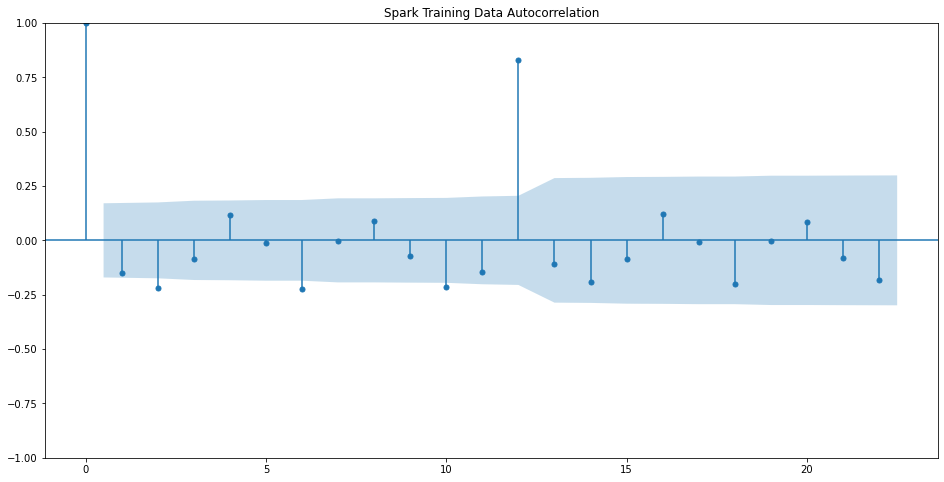

In [297]:
plot_acf(train_spark.diff(),title='Spark Training Data Autocorrelation',missing='drop', alpha=0.05);

q=2 and Q=4

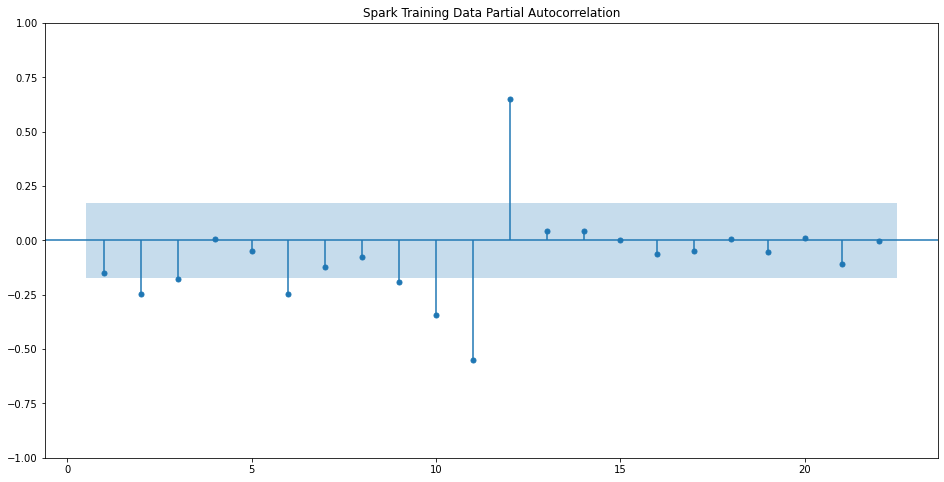

In [298]:
plot_pacf(train_spark.diff().dropna(),title='Spark Training Data Partial Autocorrelation',zero=False,method='ywmle', alpha=0.05);

p=3 / P=0

In [308]:
manual_ARIMA_spark = ARIMA(train_spark['Sparkling'], order=(3,1,2))

results_manual_ARIMA_spark = manual_ARIMA_spark.fit()

print(results_manual_ARIMA_spark.summary())

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.377
Date:                Mon, 17 Oct 2022   AIC                           2230.754
Time:                        22:42:03   BIC                           2248.005
Sample:                    01-01-1980   HQIC                          2237.764
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4330      0.042    -10.396      0.000      -0.515      -0.351
ar.L2          0.3259      0.112      2.903      0.004       0.106       0.546
ar.L3         -0.2411      0.071     -3.415      0.0

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


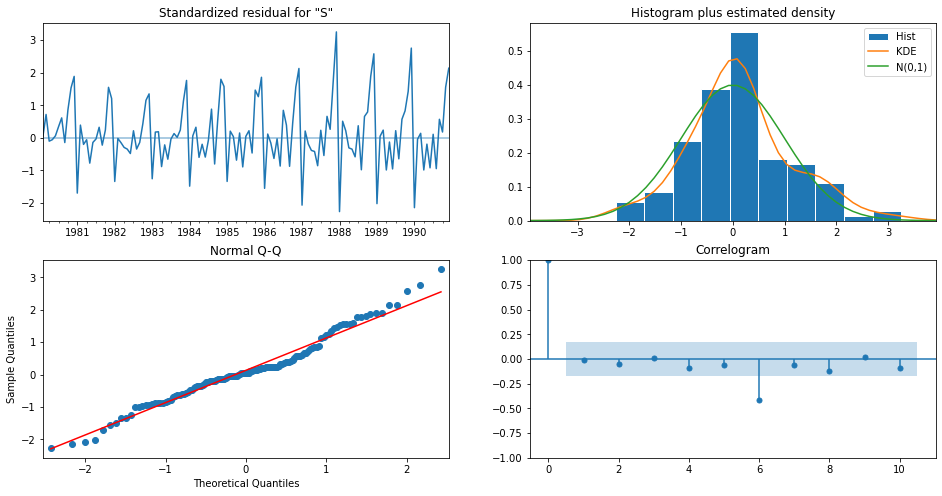

In [309]:
results_manual_ARIMA_spark.plot_diagnostics();

In [310]:
predicted_manual_ARIMA_spark = results_manual_ARIMA_spark.forecast(steps=len(test_spark))

In [314]:
rmse_ARIMA_manual_test_spark = mean_squared_error(test_spark['Sparkling'],predicted_manual_ARIMA_spark.values,squared=False)
print("For ARIMA_pdq model on the Test Data,  RMSE is %3.3f" %(rmse_ARIMA_manual_test_spark))

For ARIMA_pdq model on the Test Data,  RMSE is 1283.353


In [321]:
resultsDf_ARIMA_manual = pd.DataFrame({'Test RMSE': [rmse_ARIMA_manual_test_spark]}
                           ,index=['ARIMA_manual_Model'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsDf_ARIMA_manual])
resultsDf_spark

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
8pointTrailingMovingAverage  1342.567772
SESModel                     1338.012144
DESModel                     3949.993290
TESModel                      379.695686
ARIMA_pdq_Model              1299.979524
SARIMA_pdq_Model              826.659783
ARIMA_manual_Model           1283.352842

#### SARIMA model

In [322]:
import statsmodels.api as sm

manual_SARIMA_spark = sm.tsa.statespace.SARIMAX(train_spark['Sparkling'],
                                order=(3,1,2),
                                seasonal_order=(0, 1, 4, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark = manual_SARIMA_spark.fit(maxiter=1000)
print(results_manual_SARIMA_spark.summary())

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                          SARIMAX Results                                           
Dep. Variable:                                    Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(0, 1, [1, 2, 3, 4], 6)   Log Likelihood                -771.591
Date:                                      Mon, 17 Oct 2022   AIC                           1563.182
Time:                                              23:21:48   BIC                           1589.032
Sample:                                          01-01-1980   HQIC                          1573.638
                                               - 12-01-1990                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3301      0.112  

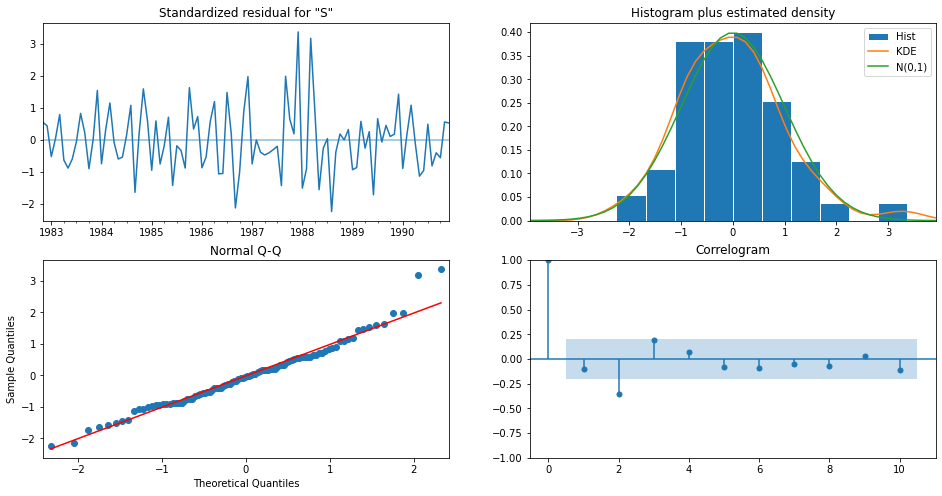

In [324]:
results_manual_SARIMA_spark.plot_diagnostics();

In [325]:
predicted_manual_SARIMA_spark = results_manual_SARIMA_spark.forecast(steps=len(test_spark))

In [326]:
rmse_SARIMA_manual_test_spark = mean_squared_error(test_spark['Sparkling'],predicted_manual_SARIMA_spark.values,squared=False)
print("For SARIMA_manual model on the Test Data,  RMSE is %3.3f" %(rmse_SARIMA_manual_test_spark))

For SARIMA_manual model on the Test Data,  RMSE is 1019.873


In [327]:
resultsDf_SARIMA_manual = pd.DataFrame({'Test RMSE': [rmse_SARIMA_manual_test_spark]}
                           ,index=['SARIMA_manual_Model'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsDf_SARIMA_manual])
resultsDf_spark

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
8pointTrailingMovingAverage  1342.567772
SESModel                     1338.012144
DESModel                     3949.993290
TESModel                      379.695686
ARIMA_pdq_Model              1299.979524
SARIMA_pdq_Model              826.659783
ARIMA_manual_Model           1283.352842
SARIMA_manual_Model          1019.873288

### Rose

#### ARIMA model

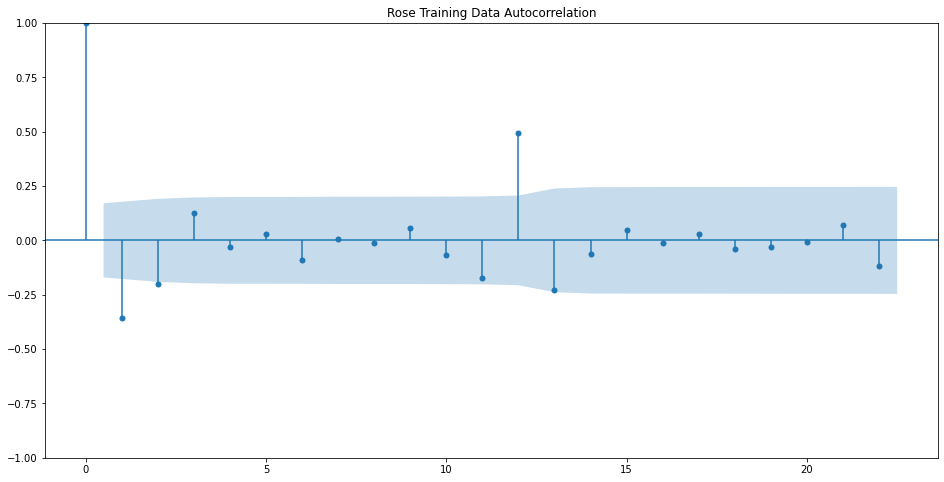

In [328]:
plot_acf(train_rose.diff(),title='Rose Training Data Autocorrelation',missing='drop', alpha=0.05);

q=3 and Q=0

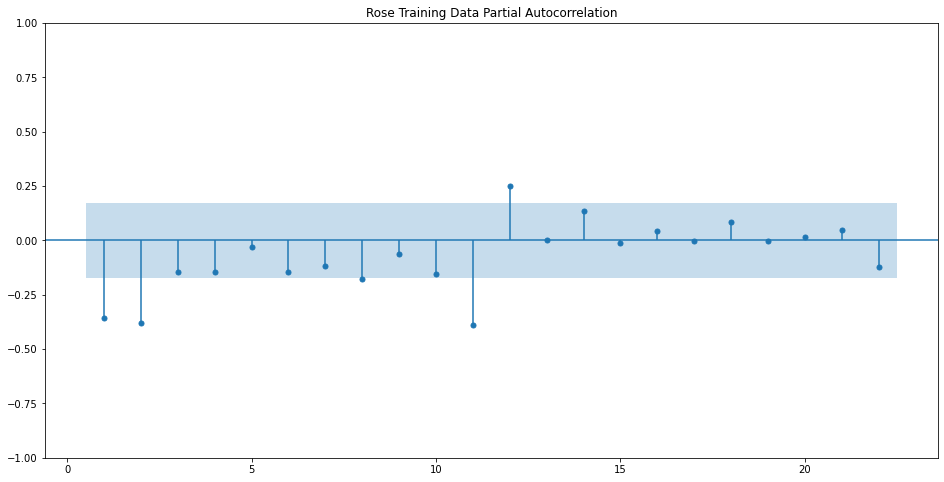

In [329]:
plot_pacf(train_rose.diff().dropna(),title='Rose Training Data Partial Autocorrelation',zero=False,method='ywmle', alpha=0.05);

p=3 / P=0

In [239]:
manual_ARIMA_rose = ARIMA(train_rose['Rose'], order=(3,1,3))

results_manual_ARIMA_rose = manual_ARIMA_rose.fit()

print(results_manual_ARIMA_rose.summary())

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -632.331
Date:                Sat, 22 Oct 2022   AIC                           1278.661
Time:                        21:20:51   BIC                           1298.788
Sample:                    01-01-1980   HQIC                          1286.840
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5877      0.088    -18.005      0.000      -1.761      -1.415
ar.L2         -0.6454      0.142     -4.545      0.000      -0.924      -0.367
ar.L3          0.1311      0.089      1.470      0.1

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


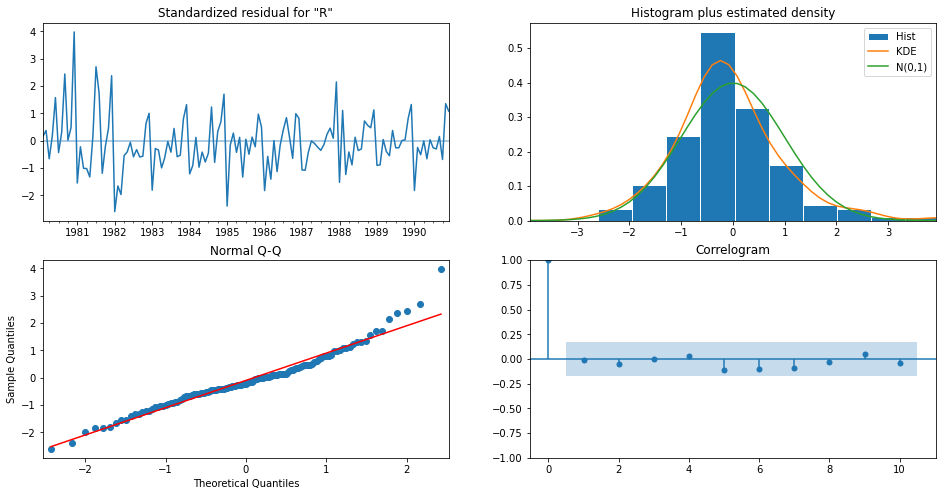

In [240]:
results_manual_ARIMA_rose.plot_diagnostics();

In [241]:
predicted_manual_ARIMA_rose = results_manual_ARIMA_rose.forecast(steps=len(test_rose))

In [242]:
rmse_ARIMA_manual_test_rose = mean_squared_error(test_rose['Rose'],predicted_manual_ARIMA_rose.values,squared=False)
print("For ARIMA_manual model on the Test Data,  RMSE is %3.3f" %(rmse_ARIMA_manual_test_rose))

For ARIMA_manual model on the Test Data,  RMSE is 36.718


In [243]:
resultsDf_ARIMA_manual_rose = pd.DataFrame({'Test RMSE': [rmse_ARIMA_manual_test_rose]}
                           ,index=['ARIMA_manual_Model'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_ARIMA_manual_rose])
resultsDf_rose

Test RMSE
RegressionOnTime             15.269416
NaiveModel                   79.718824
SimpleAverageModel           53.460645
2pointTrailingMovingAverage  11.529409
4pointTrailingMovingAverage  14.450661
6pointTrailingMovingAverage  14.567606
8pointTrailingMovingAverage  14.807035
SESModel                     36.796338
DESModel                     15.269789
TESModel                     14.263638
ARIMA_pdq_Model              36.815898
SARIMA_pdq_Model             27.124785
ARIMA_manual_Model           36.718313

#### SARIMA model

In [244]:
import statsmodels.api as sm

manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'],
                                order=(3,1,3),
                                seasonal_order=(0, 1, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(0, 1, [], 6)   Log Likelihood                -623.661
Date:                            Sat, 22 Oct 2022   AIC                           1261.322
Time:                                    21:21:06   BIC                           1280.893
Sample:                                01-01-1980   HQIC                          1269.271
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3438      0.093     -3.685      0.000      -0.527      -0.161
ar.L2         -0.7186      0.063   

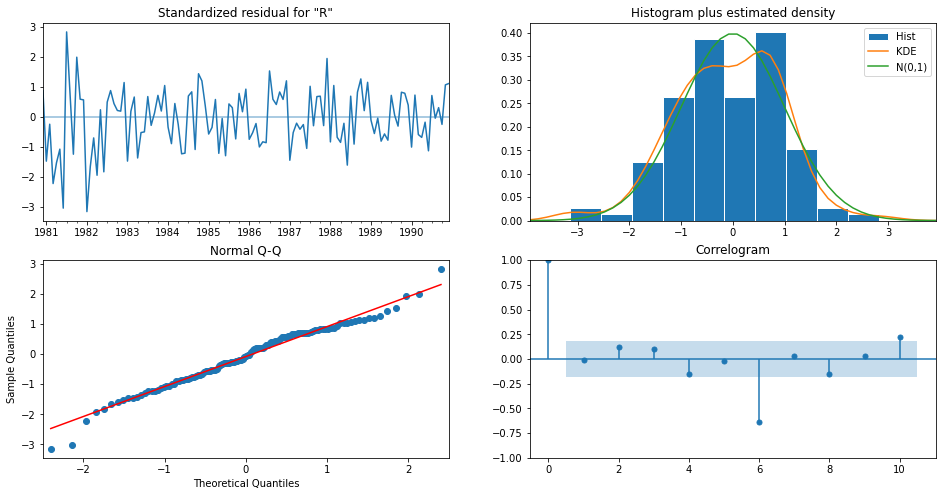

In [245]:
results_manual_SARIMA_rose.plot_diagnostics();

In [246]:
predicted_manual_SARIMA_rose = results_manual_SARIMA_rose.forecast(steps=len(test_rose))

In [247]:
pred_dynamic = predicted_manual_SARIMA_rose.get_prediction(start=pd.to_datetime('1995-08-01'), dynamic=True, full_results=True)

AttributeError: 'Series' object has no attribute 'get_prediction'

In [248]:
rmse_SARIMA_manual_test_rose = mean_squared_error(test_rose['Rose'],predicted_manual_SARIMA_rose.values,squared=False)
print("For SARIMA_manual model on the Test Data,  RMSE is %3.3f" %(rmse_SARIMA_manual_test_rose))

For SARIMA_manual model on the Test Data,  RMSE is 39.533


In [249]:
resultsDf_SARIMA_manual_rose = pd.DataFrame({'Test RMSE': [rmse_SARIMA_manual_test_rose]}
                           ,index=['SARIMA_manual_Model'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_SARIMA_manual_rose])
resultsDf_rose

Test RMSE
RegressionOnTime             15.269416
NaiveModel                   79.718824
SimpleAverageModel           53.460645
2pointTrailingMovingAverage  11.529409
4pointTrailingMovingAverage  14.450661
6pointTrailingMovingAverage  14.567606
8pointTrailingMovingAverage  14.807035
SESModel                     36.796338
DESModel                     15.269789
TESModel                     14.263638
ARIMA_pdq_Model              36.815898
SARIMA_pdq_Model             27.124785
ARIMA_manual_Model           36.718313
SARIMA_manual_Model          39.533138

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.
2


### Sparkling

In [345]:
resultsDf_spark

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
8pointTrailingMovingAverage  1342.567772
SESModel                     1338.012144
DESModel                     3949.993290
TESModel                      379.695686
ARIMA_pdq_Model              1299.979524
SARIMA_pdq_Model              826.659783
ARIMA_manual_Model           1283.352842
SARIMA_manual_Model          1019.873288

TES model is best among all

### Rose

In [250]:
resultsDf_rose

Test RMSE
RegressionOnTime             15.269416
NaiveModel                   79.718824
SimpleAverageModel           53.460645
2pointTrailingMovingAverage  11.529409
4pointTrailingMovingAverage  14.450661
6pointTrailingMovingAverage  14.567606
8pointTrailingMovingAverage  14.807035
SESModel                     36.796338
DESModel                     15.269789
TESModel                     14.263638
ARIMA_pdq_Model              36.815898
SARIMA_pdq_Model             27.124785
ARIMA_manual_Model           36.718313
SARIMA_manual_Model          39.533138

MA models and TES model are best among all

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.
3


### Sparkling

In [352]:
df_spark.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [376]:
TES_spark = ExponentialSmoothing(df_spark['Sparkling'],trend='additive',seasonal='additive',initialization_method='estimated')
TES_sparkling = TES_spark.fit()

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [377]:
TES_sparkling.params

{'smoothing_level': 0.07596713833847582,
 'smoothing_trend': 0.03256922042142542,
 'smoothing_seasonal': 0.37660763013263704,
 'damping_trend': nan,
 'initial_level': 2356.500976792558,
 'initial_trend': -1.0362742462267969,
 'initial_seasons': array([-636.25317961, -723.00028675, -398.67051497, -473.45456398,
        -808.43195611, -815.36867317, -384.24769271,   72.9999949 ,
        -237.46126013,  272.34548254, 1541.39087625, 2590.11216133]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [390]:
TES_predict_sparkling =  TES_sparkling.forecast(steps=12)
TES_predict_sparkling

1995-08-01    1877.418973
1995-09-01    2405.272289
1995-10-01    3242.091582
1995-11-01    3922.174721
1995-12-01    6118.486885
1996-01-01    1262.602775
1996-02-01    1592.120997
1996-03-01    1831.635313
1996-04-01    1806.451718
1996-05-01    1651.704099
1996-06-01    1586.487882
1996-07-01    1976.989421
Freq: MS, dtype: float64

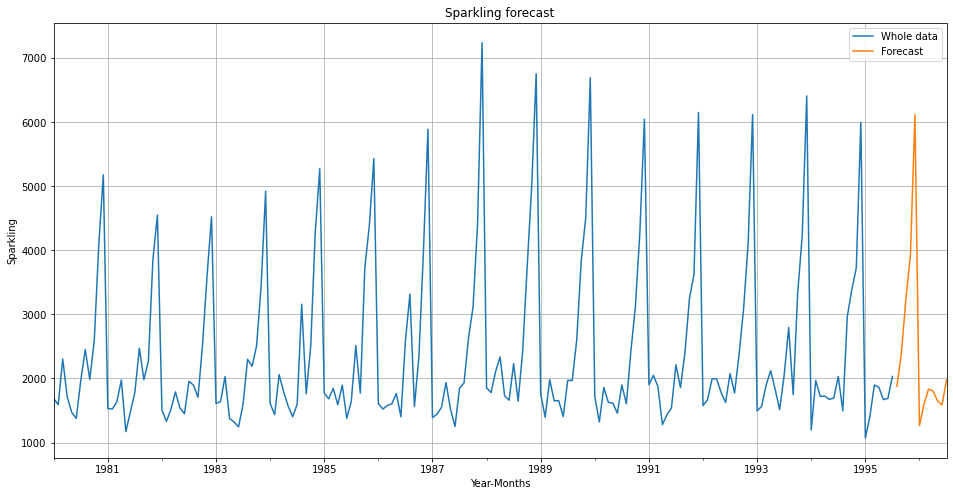

In [404]:
axis = df_spark['Sparkling'].plot(label='Whole data')
TES_predict_sparkling.plot(ax=axis, label='Forecast')

axis.set_title('Sparkling forecast')
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

### Rose

In [252]:
df_rose.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [253]:
TES_rose = ExponentialSmoothing(df_rose['Rose'],trend='additive',seasonal='additive',initialization_method='estimated')
TES_rose = TES_rose.fit()

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [254]:
TES_rose.params

{'smoothing_level': 0.09688703220086504,
 'smoothing_trend': 1.153463764049725e-05,
 'smoothing_seasonal': 8.610887784810513e-05,
 'damping_trend': nan,
 'initial_level': 145.50189021278803,
 'initial_trend': -0.5373158948766142,
 'initial_seasons': array([-28.07666039, -17.21945901,  -9.119496  , -15.77603716,
        -11.86135785,  -5.83432707,   5.30507007,   5.31697715,
          2.67072552,   1.9040477 ,  17.03158686,  55.90270161]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [255]:
TES_predict_rose =  TES_rose.forecast(steps=12)
TES_predict_rose

1995-08-01    50.018600
1995-09-01    46.835018
1995-10-01    45.531078
1995-11-01    60.121312
1995-12-01    98.455017
1996-01-01    13.938433
1996-02-01    24.258307
1996-03-01    31.820954
1996-04-01    24.627111
1996-05-01    28.004465
1996-06-01    33.494194
1996-07-01    44.095214
Freq: MS, dtype: float64

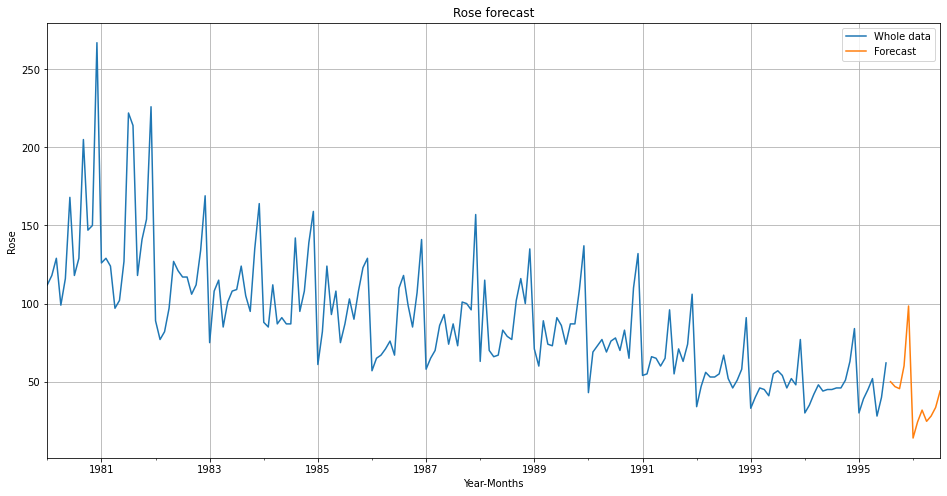

In [256]:
axis = df_rose['Rose'].plot(label='Whole data')
TES_predict_rose.plot(ax=axis, label='Forecast')

axis.set_title('Rose forecast')
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid();

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales. 
## Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.
5


### Sparkling

### Rose

## Quality of Business Report (Please refer to the Evaluation Guidelines for Business report checklist. Marks in this criteria are at the moderator's discretion)
6